**Simulation Based on SUSTAIN 1 Trial results**

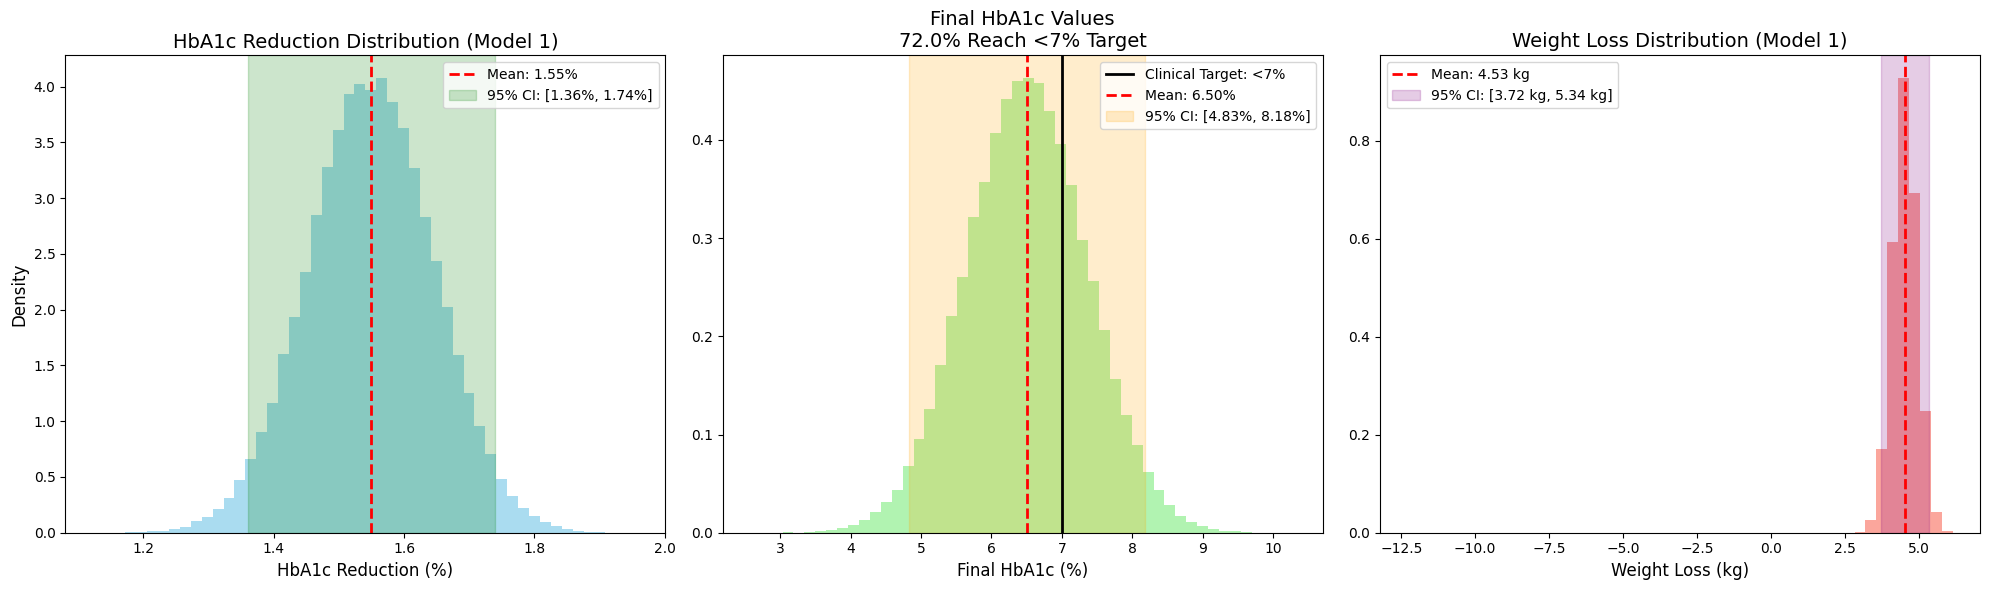

=== Treatment Effectiveness ===
1. HbA1c Reduction: 1.55% (95% CI: [1.36%, 1.74%])
2. Patients reaching HbA1c <7%: 72.0% (95% CI: [0.0%, 100.0%])
3. Weight Loss: 4.53 kg (95% CI: [3.72 kg, 5.34 kg])


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# --- Input Parameters (Based on SUSTAIN Trials) ---
# Baseline HbA1c distribution (for calculating % reaching <7%)
mean_baseline_hba1c = 8.05      # Mean baseline HbA1c (%)
std_baseline_hba1c = 0.85      # Standard deviation (%)

# HbA1c Reduction (%)
mean_hba1c_reduction = 1.55     # Mean reduction
std_hba1c_reduction = 0.097      # Standard deviation

# Weight Loss (kg)
mean_weight_loss_kg = 4.53       # Mean loss
std_weight_loss_kg = 0.413        # Standard deviation

# Baseline weights
mean_baseline_weight = 91.93       # kg
std_baseline_weight = 23.83        # kg

# Simulation Parameters
n_simulations = 100000          # Number of iterations

# --- Generate Data ---
baseline_hba1c = np.random.normal(mean_baseline_hba1c, std_baseline_hba1c, n_simulations)
baseline_weights = np.random.normal(mean_baseline_weight, std_baseline_weight, n_simulations)

# --- Simulate Outcomes ---
hba1c_reductions = np.random.normal(mean_hba1c_reduction, std_hba1c_reduction, n_simulations)
final_hba1c = baseline_hba1c - hba1c_reductions
prop_under_7 = np.mean(final_hba1c < 7.0) * 100

weight_loss_kg = np.random.normal(mean_weight_loss_kg, std_weight_loss_kg, n_simulations)
weight_loss_kg = np.minimum(weight_loss_kg, baseline_weights)  # Physical constraint

# --- Calculate Statistics ---
# HbA1c Reduction
mean_hba1c_red = np.mean(hba1c_reductions)
ci_hba1c_red = np.percentile(hba1c_reductions, [2.5, 97.5])

# Final HbA1c <7%
ci_prop_under_7 = np.percentile((final_hba1c < 7.0) * 100, [2.5, 97.5])  # Bootstrap CI

# Weight Loss
mean_weight_loss = np.mean(weight_loss_kg)
ci_weight_loss = np.percentile(weight_loss_kg, [2.5, 97.5])

# --- Enhanced Visualization with CIs ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: HbA1c Reduction Distribution
n1, bins1, patches1 = ax1.hist(hba1c_reductions, bins=50, density=True, alpha=0.7, color='skyblue')
ax1.axvline(mean_hba1c_red, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_hba1c_red:.2f}%')
ax1.axvspan(ci_hba1c_red[0], ci_hba1c_red[1], color='green', alpha=0.2,
            label=f'95% CI: [{ci_hba1c_red[0]:.2f}%, {ci_hba1c_red[1]:.2f}%]')
ax1.set_xlabel('HbA1c Reduction (%)', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('HbA1c Reduction Distribution (Model 1)', fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Final HbA1c with <7% Threshold
n2, bins2, patches2 = ax2.hist(final_hba1c, bins=50, density=True, alpha=0.7, color='lightgreen')
ax2.axvline(7.0, color='black', linestyle='-', linewidth=2,
            label='Clinical Target: <7%')
ax2.axvline(np.mean(final_hba1c), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(final_hba1c):.2f}%')
ax2.axvspan(np.percentile(final_hba1c, 2.5), np.percentile(final_hba1c, 97.5),
            color='orange', alpha=0.2,
            label=f'95% CI: [{np.percentile(final_hba1c, 2.5):.2f}%, {np.percentile(final_hba1c, 97.5):.2f}%]')
ax2.set_xlabel('Final HbA1c (%)', fontsize=12)
ax2.set_title(f'Final HbA1c Values\n{prop_under_7:.1f}% Reach <7% Target', fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Weight Loss Distribution
n3, bins3, patches3 = ax3.hist(weight_loss_kg, bins=50, density=True, alpha=0.7, color='salmon')
ax3.axvline(mean_weight_loss, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_weight_loss:.2f} kg')
ax3.axvspan(ci_weight_loss[0], ci_weight_loss[1], color='purple', alpha=0.2,
            label=f'95% CI: [{ci_weight_loss[0]:.2f} kg, {ci_weight_loss[1]:.2f} kg]')
ax3.set_xlabel('Weight Loss (kg)', fontsize=12)
ax3.set_title('Weight Loss Distribution (Model 1)', fontsize=14)
ax3.legend(fontsize=10)

plt.tight_layout()
plt.show()

# --- Print Results ---
print("=== Treatment Effectiveness ===")
print(f"1. HbA1c Reduction: {mean_hba1c_red:.2f}% (95% CI: [{ci_hba1c_red[0]:.2f}%, {ci_hba1c_red[1]:.2f}%])")
print(f"2. Patients reaching HbA1c <7%: {prop_under_7:.1f}% (95% CI: [{ci_prop_under_7[0]:.1f}%, {ci_prop_under_7[1]:.1f}%])")
print(f"3. Weight Loss: {mean_weight_loss:.2f} kg (95% CI: [{ci_weight_loss[0]:.2f} kg, {ci_weight_loss[1]:.2f} kg])")

Running main simulation...

Running sensitivity analysis...


Baseline HbA1c Variability: 100%|██████████| 3/3 [00:00<00:00, 28.46it/s]



Testing convergence...


Convergence Testing: 100%|██████████| 6/6 [00:00<00:00, 25.36it/s]


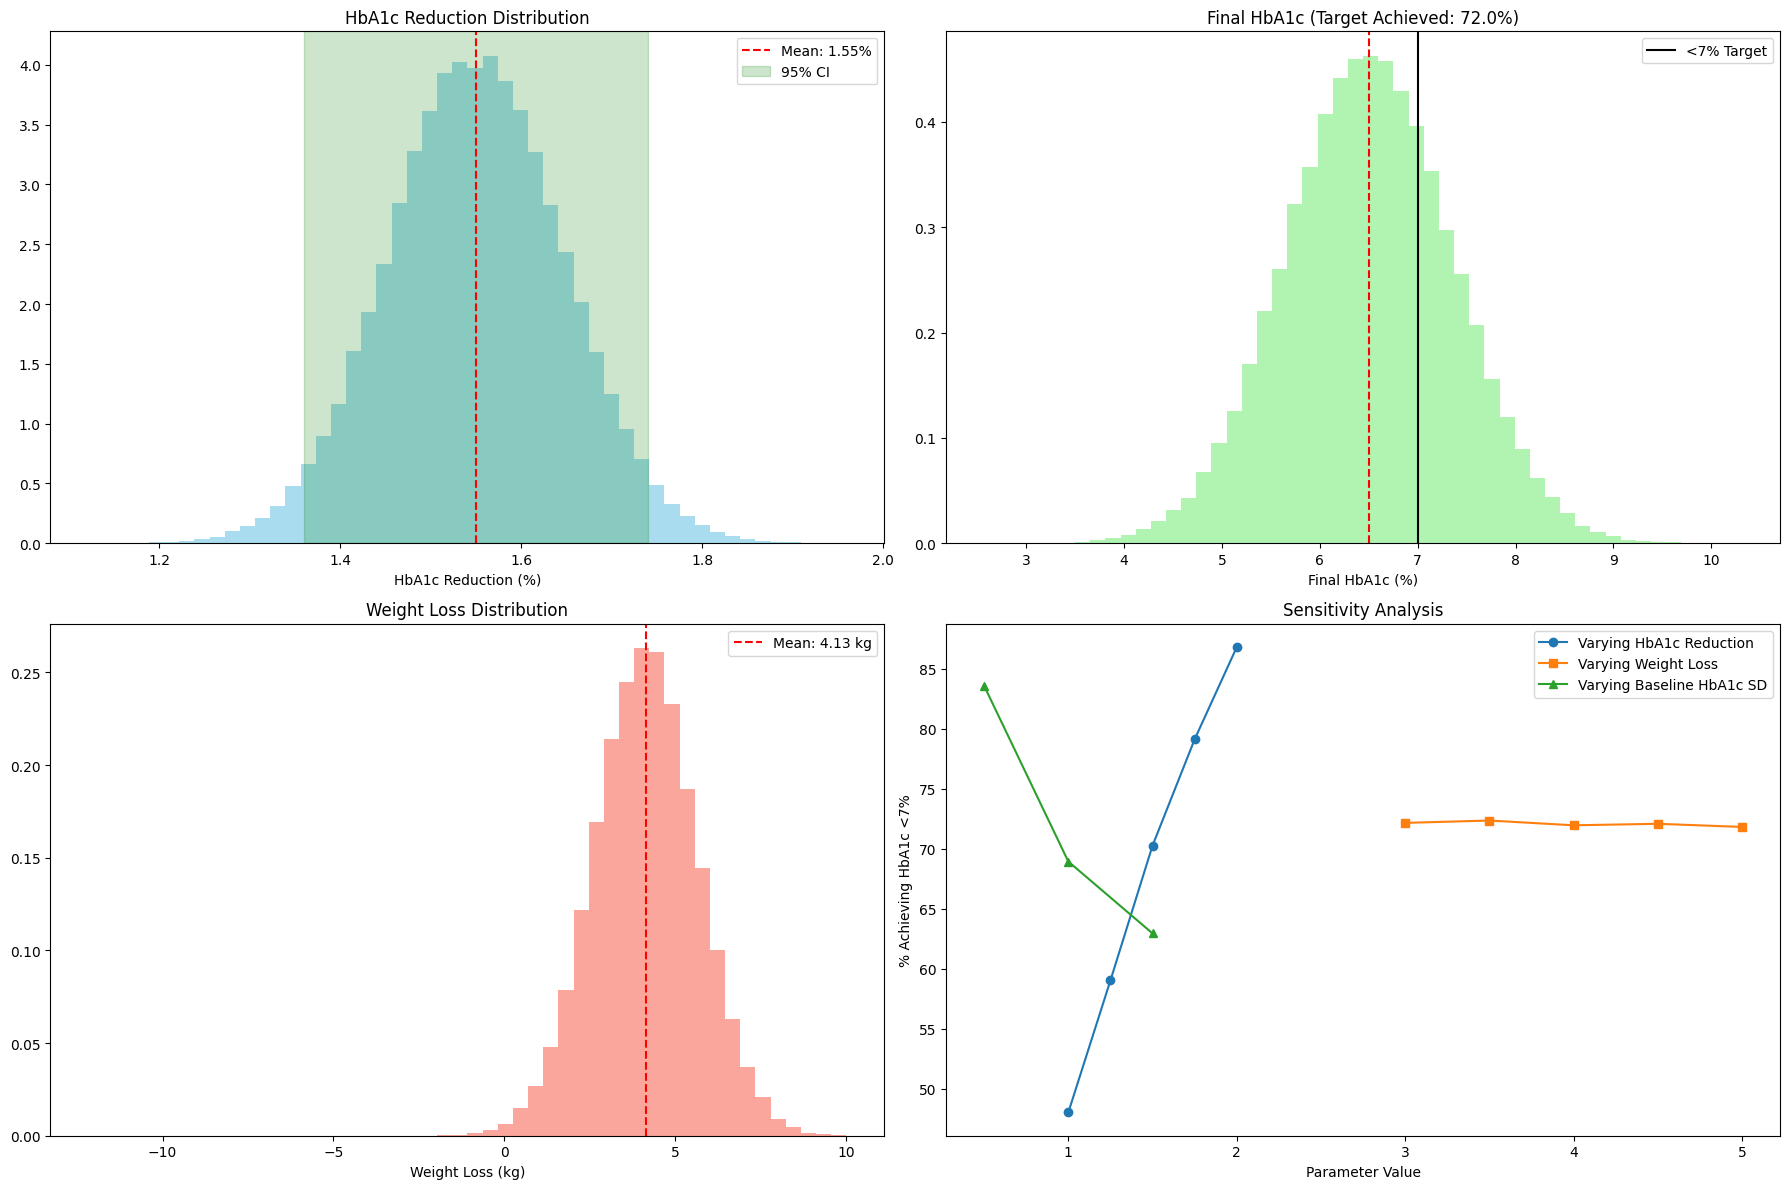

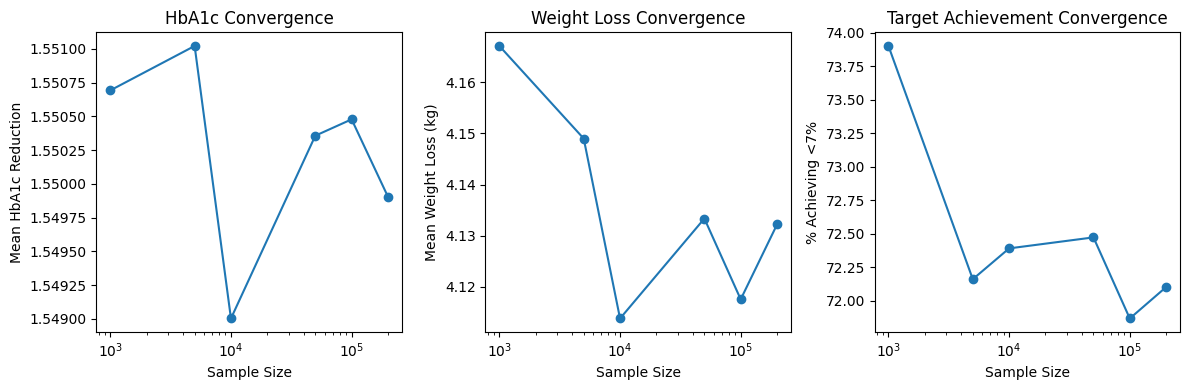


=== Final Results ===
1. HbA1c Reduction: 1.55% (95% CI: [1.36%, 1.74%])
2. Patients reaching HbA1c <7%: 72.0% (95% CI: [0.0%, 100.0%])
3. Weight Loss: 4.13 kg (95% CI: [1.18 kg, 7.08 kg])


In [2]:
#import numpy as np
#import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bars

# Set random seed for reproducibility
np.random.seed(42)

# --- Core Simulation Function ---
def run_simulation(params, n_simulations=100000):
    """Run Monte Carlo simulation with given parameters"""
    baseline_hba1c = np.random.normal(params['mean_baseline_hba1c'], params['std_baseline_hba1c'], n_simulations)
    baseline_weights = np.random.normal(params['mean_baseline_weight'], params['std_baseline_weight'], n_simulations)

    hba1c_reductions = np.random.normal(params['mean_hba1c_reduction'], params['std_hba1c_reduction'], n_simulations)
    final_hba1c = baseline_hba1c - hba1c_reductions

    weight_loss_kg = np.random.normal(params['mean_weight_loss_kg'], params['std_weight_loss_kg'], n_simulations)
    weight_loss_kg = np.minimum(weight_loss_kg, baseline_weights)

    return {
        'hba1c_reductions': hba1c_reductions,
        'final_hba1c': final_hba1c,
        'weight_loss_kg': weight_loss_kg,
        'prop_under_7': np.mean(final_hba1c < 7.0) * 100
    }

# --- Default Parameters ---
default_params = {
    'mean_baseline_hba1c': 8.05,
    'std_baseline_hba1c': 0.85,
    'mean_hba1c_reduction': 1.55,
    'std_hba1c_reduction': 0.097,
    'mean_weight_loss_kg': 4.13,
    'std_weight_loss_kg': 1.5,
    'mean_baseline_weight': 91.93,
    'std_baseline_weight': 23.8
}

# --- 1. Main Simulation ---
print("Running main simulation...")
results = run_simulation(default_params)

# --- 2. Sensitivity Analysis ---
print("\nRunning sensitivity analysis...")
sensitivity_params = {
    'mean_hba1c_reduction': np.linspace(1.0, 2.0, 5),  # Test 1.0% to 2.0% reduction
    'mean_weight_loss_kg': np.linspace(3.0, 5.0, 5),    # Test 3.0kg to 5.0kg loss
    'std_baseline_hba1c': np.linspace(0.5, 1.5, 3)      # Test different baseline variability
}

sensitivity_results = {'hba1c': [], 'weight': [], 'target': []}

# Vary mean HbA1c reduction
for val in tqdm(sensitivity_params['mean_hba1c_reduction'], desc="HbA1c Reduction Sensitivity"):
    params = default_params.copy()
    params['mean_hba1c_reduction'] = val
    res = run_simulation(params, 50000)
    sensitivity_results['hba1c'].append((val, res['prop_under_7']))

# Vary mean weight loss
for val in tqdm(sensitivity_params['mean_weight_loss_kg'], desc="Weight Loss Sensitivity"):
    params = default_params.copy()
    params['mean_weight_loss_kg'] = val
    res = run_simulation(params, 50000)
    sensitivity_results['weight'].append((val, res['prop_under_7']))  # Tracking impact on HbA1c target

# Vary baseline HbA1c variability
for val in tqdm(sensitivity_params['std_baseline_hba1c'], desc="Baseline HbA1c Variability"):
    params = default_params.copy()
    params['std_baseline_hba1c'] = val
    res = run_simulation(params, 50000)
    sensitivity_results['target'].append((val, res['prop_under_7']))

# --- 3. Convergence Testing ---
print("\nTesting convergence...")
sample_sizes = [1000, 5000, 10000, 50000, 100000, 200000]
convergence_results = {'hba1c': [], 'weight': [], 'target': []}

for n in tqdm(sample_sizes, desc="Convergence Testing"):
    res = run_simulation(default_params, n)
    convergence_results['hba1c'].append((n, np.mean(res['hba1c_reductions'])))
    convergence_results['weight'].append((n, np.mean(res['weight_loss_kg'])))
    convergence_results['target'].append((n, res['prop_under_7']))

# --- Visualization ---
plt.figure(figsize=(18, 12))

# Plot 1: Main Results
plt.subplot(2, 2, 1)
plt.hist(results['hba1c_reductions'], bins=50, density=True, alpha=0.7, color='skyblue')
plt.axvline(np.mean(results['hba1c_reductions']), color='red', linestyle='--',
            label=f'Mean: {np.mean(results["hba1c_reductions"]):.2f}%')
plt.axvspan(np.percentile(results['hba1c_reductions'], 2.5), np.percentile(results['hba1c_reductions'], 97.5),
            color='green', alpha=0.2, label='95% CI')
plt.xlabel('HbA1c Reduction (%)')
plt.title('HbA1c Reduction Distribution')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(results['final_hba1c'], bins=50, density=True, alpha=0.7, color='lightgreen')
plt.axvline(7.0, color='black', linestyle='-', label='<7% Target')
plt.axvline(np.mean(results['final_hba1c']), color='red', linestyle='--')
plt.xlabel('Final HbA1c (%)')
plt.title(f'Final HbA1c (Target Achieved: {results["prop_under_7"]:.1f}%)')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(results['weight_loss_kg'], bins=50, density=True, alpha=0.7, color='salmon')
plt.axvline(np.mean(results['weight_loss_kg']), color='red', linestyle='--',
            label=f'Mean: {np.mean(results["weight_loss_kg"]):.2f} kg')
plt.xlabel('Weight Loss (kg)')
plt.title('Weight Loss Distribution')
plt.legend()

# Plot 2: Sensitivity Analysis
plt.subplot(2, 2, 4)
x1, y1 = zip(*sensitivity_results['hba1c'])
x2, y2 = zip(*sensitivity_results['weight'])
x3, y3 = zip(*sensitivity_results['target'])

plt.plot(x1, y1, 'o-', label='Varying HbA1c Reduction')
plt.plot(x2, y2, 's-', label='Varying Weight Loss')
plt.plot(x3, y3, '^-', label='Varying Baseline HbA1c SD')
plt.xlabel('Parameter Value')
plt.ylabel('% Achieving HbA1c <7%')
plt.title('Sensitivity Analysis')
plt.legend()

plt.tight_layout()
plt.show()

# Plot 3: Convergence Testing
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
x, y = zip(*convergence_results['hba1c'])
plt.plot(x, y, 'o-')
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('Mean HbA1c Reduction')
plt.title('HbA1c Convergence')

plt.subplot(1, 3, 2)
x, y = zip(*convergence_results['weight'])
plt.plot(x, y, 'o-')
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('Mean Weight Loss (kg)')
plt.title('Weight Loss Convergence')

plt.subplot(1, 3, 3)
x, y = zip(*convergence_results['target'])
plt.plot(x, y, 'o-')
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('% Achieving <7%')
plt.title('Target Achievement Convergence')

plt.tight_layout()
plt.show()

# --- Print Results ---
print("\n=== Final Results ===")
print(f"1. HbA1c Reduction: {np.mean(results['hba1c_reductions']):.2f}% "
      f"(95% CI: [{np.percentile(results['hba1c_reductions'], 2.5):.2f}%, "
      f"{np.percentile(results['hba1c_reductions'], 97.5):.2f}%])")

print(f"2. Patients reaching HbA1c <7%: {results['prop_under_7']:.1f}% "
      f"(95% CI: [{np.percentile((results['final_hba1c'] < 7.0) * 100, 2.5):.1f}%, "
      f"{np.percentile((results['final_hba1c'] < 7.0) * 100, 97.5):.1f}%])")

print(f"3. Weight Loss: {np.mean(results['weight_loss_kg']):.2f} kg "
      f"(95% CI: [{np.percentile(results['weight_loss_kg'], 2.5):.2f} kg, "
      f"{np.percentile(results['weight_loss_kg'], 97.5):.2f} kg])")

**Simulation Based on SUSTAIN 2 Trial results**

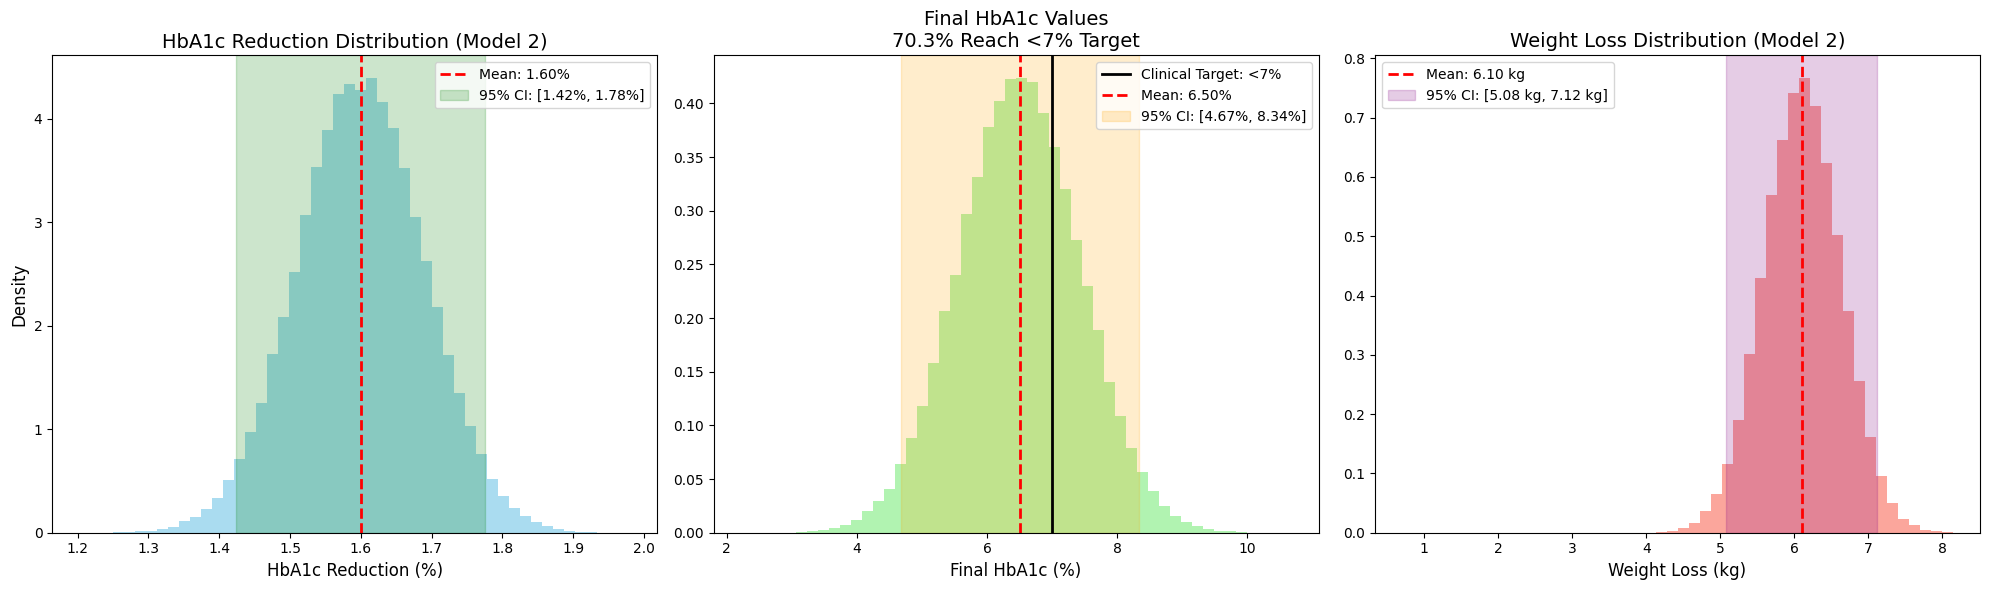

=== Treatment Effectiveness ===
1. HbA1c Reduction: 1.60% (95% CI: [1.42%, 1.78%])
2. Patients reaching HbA1c <7%: 70.3% (95% CI: [0.0%, 100.0%])
3. Weight Loss: 6.10 kg (95% CI: [5.08 kg, 7.12 kg])


In [13]:


# Set random seed for reproducibility
np.random.seed(42)

# --- Input Parameters (Based on SUSTAIN Trials) ---
# Baseline HbA1c distribution (for calculating % reaching <7%)
mean_baseline_hba1c = 8.1      # Mean baseline HbA1c (%)
std_baseline_hba1c = 0.93       # Standard deviation (%)

# HbA1c Reduction (%)
mean_hba1c_reduction = 1.6    # Mean reduction
std_hba1c_reduction = 0.09      # Standard deviation

# Weight Loss (kg)
mean_weight_loss_kg = 6.1       # Mean loss
std_weight_loss_kg = 0.52        # Standard deviation

# Baseline weights
mean_baseline_weight = 89.5       # kg
std_baseline_weight = 20.3        # kg

# Simulation Parameters
n_simulations = 100000          # Number of iterations

# --- Generate Data ---
baseline_hba1c = np.random.normal(mean_baseline_hba1c, std_baseline_hba1c, n_simulations)
baseline_weights = np.random.normal(mean_baseline_weight, std_baseline_weight, n_simulations)

# --- Simulate Outcomes ---
hba1c_reductions = np.random.normal(mean_hba1c_reduction, std_hba1c_reduction, n_simulations)
final_hba1c = baseline_hba1c - hba1c_reductions
prop_under_7 = np.mean(final_hba1c < 7.0) * 100

weight_loss_kg = np.random.normal(mean_weight_loss_kg, std_weight_loss_kg, n_simulations)
weight_loss_kg = np.minimum(weight_loss_kg, baseline_weights)  # Physical constraint

# --- Calculate Statistics ---
# HbA1c Reduction
mean_hba1c_red = np.mean(hba1c_reductions)
ci_hba1c_red = np.percentile(hba1c_reductions, [2.5, 97.5])

# Final HbA1c <7%
ci_prop_under_7 = np.percentile((final_hba1c < 7.0) * 100, [2.5, 97.5])  # Bootstrap CI

# Weight Loss
mean_weight_loss = np.mean(weight_loss_kg)
ci_weight_loss = np.percentile(weight_loss_kg, [2.5, 97.5])

# --- Enhanced Visualization with CIs ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: HbA1c Reduction Distribution
n1, bins1, patches1 = ax1.hist(hba1c_reductions, bins=50, density=True, alpha=0.7, color='skyblue')
ax1.axvline(mean_hba1c_red, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_hba1c_red:.2f}%')
ax1.axvspan(ci_hba1c_red[0], ci_hba1c_red[1], color='green', alpha=0.2,
            label=f'95% CI: [{ci_hba1c_red[0]:.2f}%, {ci_hba1c_red[1]:.2f}%]')
ax1.set_xlabel('HbA1c Reduction (%)', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('HbA1c Reduction Distribution (Model 2)', fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Final HbA1c with <7% Threshold
n2, bins2, patches2 = ax2.hist(final_hba1c, bins=50, density=True, alpha=0.7, color='lightgreen')
ax2.axvline(7.0, color='black', linestyle='-', linewidth=2,
            label='Clinical Target: <7%')
ax2.axvline(np.mean(final_hba1c), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(final_hba1c):.2f}%')
ax2.axvspan(np.percentile(final_hba1c, 2.5), np.percentile(final_hba1c, 97.5),
            color='orange', alpha=0.2,
            label=f'95% CI: [{np.percentile(final_hba1c, 2.5):.2f}%, {np.percentile(final_hba1c, 97.5):.2f}%]')
ax2.set_xlabel('Final HbA1c (%)', fontsize=12)
ax2.set_title(f'Final HbA1c Values\n{prop_under_7:.1f}% Reach <7% Target', fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Weight Loss Distribution
n3, bins3, patches3 = ax3.hist(weight_loss_kg, bins=50, density=True, alpha=0.7, color='salmon')
ax3.axvline(mean_weight_loss, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_weight_loss:.2f} kg')
ax3.axvspan(ci_weight_loss[0], ci_weight_loss[1], color='purple', alpha=0.2,
            label=f'95% CI: [{ci_weight_loss[0]:.2f} kg, {ci_weight_loss[1]:.2f} kg]')
ax3.set_xlabel('Weight Loss (kg)', fontsize=12)
ax3.set_title('Weight Loss Distribution (Model 2)', fontsize=14)
ax3.legend(fontsize=10)

plt.tight_layout()
plt.show()

# --- Print Results ---
print("=== Treatment Effectiveness ===")
print(f"1. HbA1c Reduction: {mean_hba1c_red:.2f}% (95% CI: [{ci_hba1c_red[0]:.2f}%, {ci_hba1c_red[1]:.2f}%])")
print(f"2. Patients reaching HbA1c <7%: {prop_under_7:.1f}% (95% CI: [{ci_prop_under_7[0]:.1f}%, {ci_prop_under_7[1]:.1f}%])")
print(f"3. Weight Loss: {mean_weight_loss:.2f} kg (95% CI: [{ci_weight_loss[0]:.2f} kg, {ci_weight_loss[1]:.2f} kg])")

**SUSTAIN 7 Trial Results**

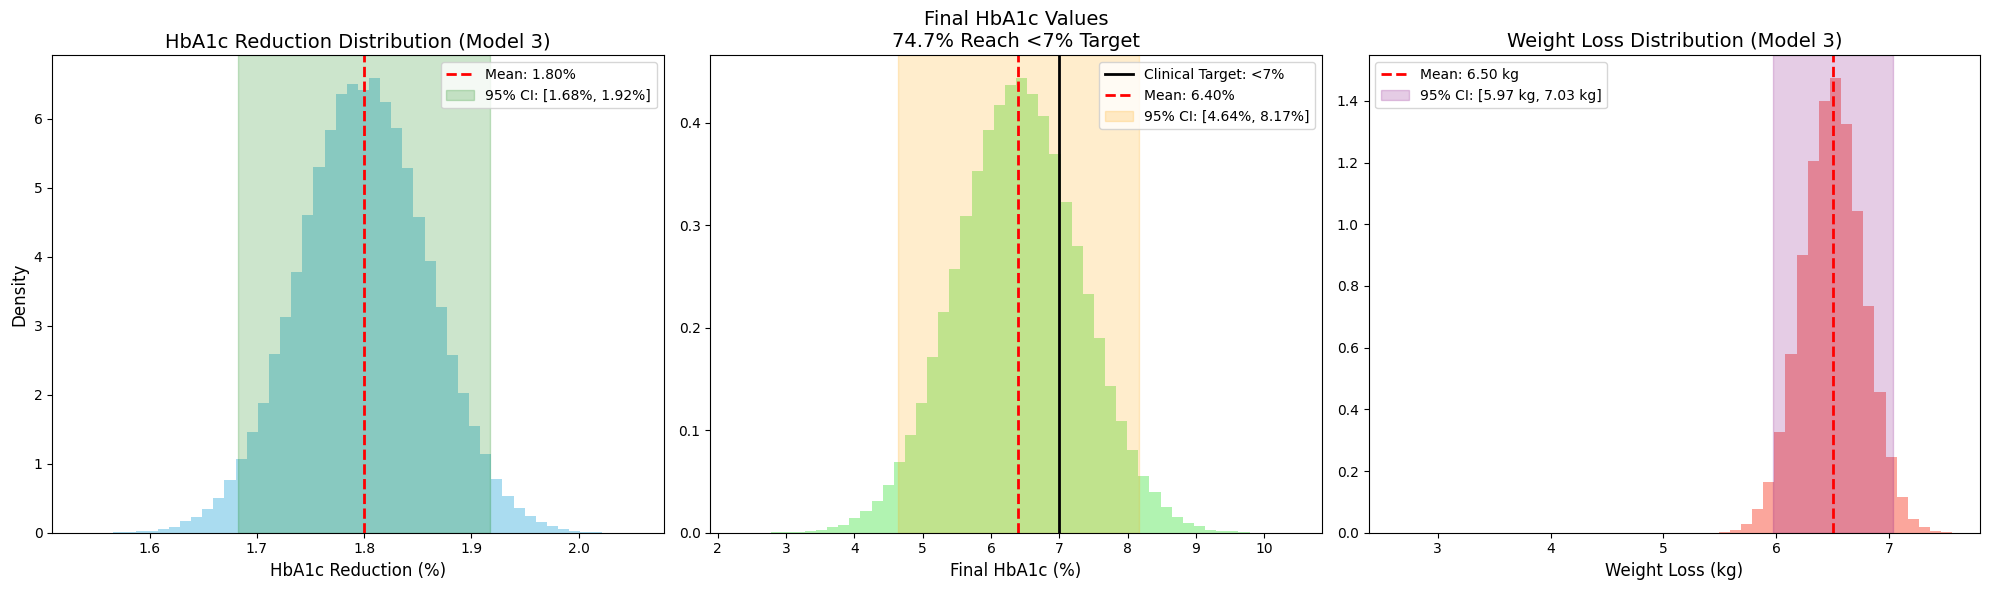

=== Treatment Effectiveness ===
1. HbA1c Reduction: 1.80% (95% CI: [1.68%, 1.92%])
2. Patients reaching HbA1c <7%: 74.7% (95% CI: [0.0%, 100.0%])
3. Weight Loss: 6.50 kg (95% CI: [5.97 kg, 7.03 kg])


In [15]:


# Set random seed for reproducibility
np.random.seed(42)

# --- Input Parameters (Based on SUSTAIN Trials) ---
# HbA1c Reduction (%)
mean_hba1c_reduction = 1.8    # Mean reduction in %
std_hba1c_reduction = 0.06     # Standard deviation in %

# Baseline HbA1c distribution (for calculating % reaching <7%)
mean_baseline_hba1c = 8.2      # Mean baseline HbA1c (%)
std_baseline_hba1c = 0.9       # Standard deviation (%)

# Weight Loss (kg) - Now in absolute values
mean_weight_loss_kg = 6.5     # Mean weight loss in kg
std_weight_loss_kg = 0.27      # Standard deviation in kg

# Baseline weights
mean_baseline_weight = 95.8     # Mean baseline weight in kg
std_baseline_weight = 21.3      # Standard deviation in kg

# Simulation Parameters
n_simulations = 100000        # Number of Monte Carlo iterations


# --- Generate Data ---
baseline_hba1c = np.random.normal(mean_baseline_hba1c, std_baseline_hba1c, n_simulations)
baseline_weights = np.random.normal(mean_baseline_weight, std_baseline_weight, n_simulations)

# --- Simulate Outcomes ---
hba1c_reductions = np.random.normal(mean_hba1c_reduction, std_hba1c_reduction, n_simulations)
final_hba1c = baseline_hba1c - hba1c_reductions
prop_under_7 = np.mean(final_hba1c < 7.0) * 100

weight_loss_kg = np.random.normal(mean_weight_loss_kg, std_weight_loss_kg, n_simulations)
weight_loss_kg = np.minimum(weight_loss_kg, baseline_weights)  # Physical constraint

# --- Calculate Statistics ---
# HbA1c Reduction
mean_hba1c_red = np.mean(hba1c_reductions)
ci_hba1c_red = np.percentile(hba1c_reductions, [2.5, 97.5])

# Final HbA1c <7%
ci_prop_under_7 = np.percentile((final_hba1c < 7.0) * 100, [2.5, 97.5])  # Bootstrap CI

# Weight Loss
mean_weight_loss = np.mean(weight_loss_kg)
ci_weight_loss = np.percentile(weight_loss_kg, [2.5, 97.5])

# --- Enhanced Visualization with CIs ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: HbA1c Reduction Distribution
n1, bins1, patches1 = ax1.hist(hba1c_reductions, bins=50, density=True, alpha=0.7, color='skyblue')
ax1.axvline(mean_hba1c_red, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_hba1c_red:.2f}%')
ax1.axvspan(ci_hba1c_red[0], ci_hba1c_red[1], color='green', alpha=0.2,
            label=f'95% CI: [{ci_hba1c_red[0]:.2f}%, {ci_hba1c_red[1]:.2f}%]')
ax1.set_xlabel('HbA1c Reduction (%)', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('HbA1c Reduction Distribution (Model 3)', fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Final HbA1c with <7% Threshold
n2, bins2, patches2 = ax2.hist(final_hba1c, bins=50, density=True, alpha=0.7, color='lightgreen')
ax2.axvline(7.0, color='black', linestyle='-', linewidth=2,
            label='Clinical Target: <7%')
ax2.axvline(np.mean(final_hba1c), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(final_hba1c):.2f}%')
ax2.axvspan(np.percentile(final_hba1c, 2.5), np.percentile(final_hba1c, 97.5),
            color='orange', alpha=0.2,
            label=f'95% CI: [{np.percentile(final_hba1c, 2.5):.2f}%, {np.percentile(final_hba1c, 97.5):.2f}%]')
ax2.set_xlabel('Final HbA1c (%)', fontsize=12)
ax2.set_title(f'Final HbA1c Values\n{prop_under_7:.1f}% Reach <7% Target', fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Weight Loss Distribution
n3, bins3, patches3 = ax3.hist(weight_loss_kg, bins=50, density=True, alpha=0.7, color='salmon')
ax3.axvline(mean_weight_loss, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_weight_loss:.2f} kg')
ax3.axvspan(ci_weight_loss[0], ci_weight_loss[1], color='purple', alpha=0.2,
            label=f'95% CI: [{ci_weight_loss[0]:.2f} kg, {ci_weight_loss[1]:.2f} kg]')
ax3.set_xlabel('Weight Loss (kg)', fontsize=12)
ax3.set_title('Weight Loss Distribution (Model 3)', fontsize=14)
ax3.legend(fontsize=10)

plt.tight_layout()
plt.show()

# --- Print Results ---
print("=== Treatment Effectiveness ===")
print(f"1. HbA1c Reduction: {mean_hba1c_red:.2f}% (95% CI: [{ci_hba1c_red[0]:.2f}%, {ci_hba1c_red[1]:.2f}%])")
print(f"2. Patients reaching HbA1c <7%: {prop_under_7:.1f}% (95% CI: [{ci_prop_under_7[0]:.1f}%, {ci_prop_under_7[1]:.1f}%])")
print(f"3. Weight Loss: {mean_weight_loss:.2f} kg (95% CI: [{ci_weight_loss[0]:.2f} kg, {ci_weight_loss[1]:.2f} kg])")

**Summary based on all trials**

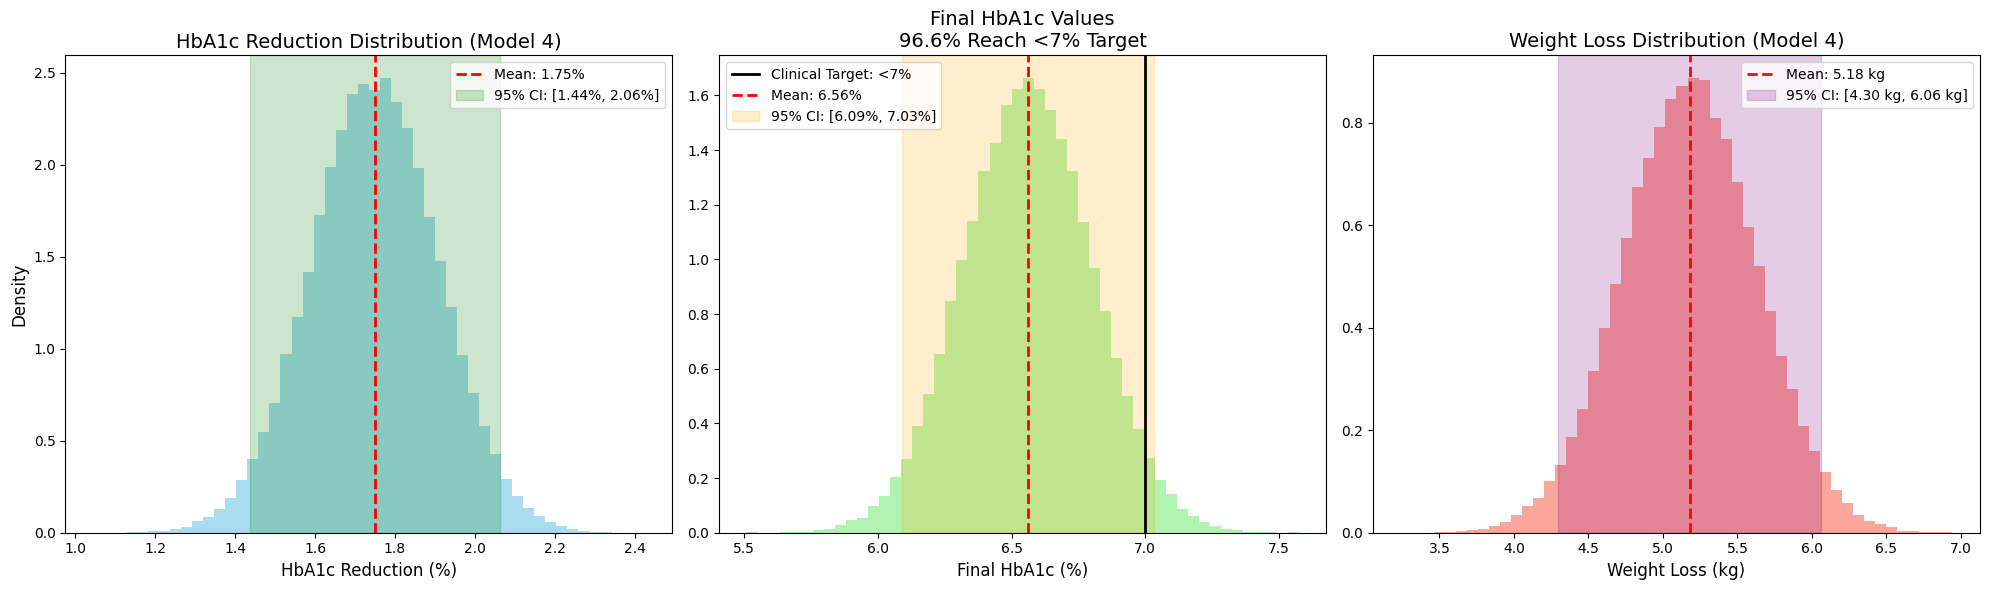

=== Treatment Effectiveness ===
1. HbA1c Reduction: 1.75% (95% CI: [1.44%, 2.06%])
2. Patients reaching HbA1c <7%: 96.6% (95% CI: [0.0%, 100.0%])
3. Weight Loss: 5.18 kg (95% CI: [4.30 kg, 6.06 kg])


In [16]:

# Set random seed for reproducibility
np.random.seed(42)

# --- Input Parameters (Based on SUSTAIN Trials) ---
# HbA1c Reduction (%)
mean_hba1c_reduction = 1.75    # Mean reduction in %
std_hba1c_reduction = 0.16     # Standard deviation in %

# Baseline HbA1c distribution (for calculating % reaching <7%)
mean_baseline_hba1c = 8.31      # Mean baseline HbA1c (%)
std_baseline_hba1c = 0.18       # Standard deviation (%)

# Weight Loss (kg) - Now in absolute values
mean_weight_loss_kg = 5.18     # Mean weight loss in kg
std_weight_loss_kg = 0.45      # Standard deviation in kg

# Baseline weights
mean_baseline_weight = 92.3     # Mean baseline weight in kg
std_baseline_weight = 2.54     # Standard deviation in kg

# Simulation Parameters
n_simulations = 100000        # Number of Monte Carlo iterations


# --- Generate Data ---
baseline_hba1c = np.random.normal(mean_baseline_hba1c, std_baseline_hba1c, n_simulations)
baseline_weights = np.random.normal(mean_baseline_weight, std_baseline_weight, n_simulations)

# --- Simulate Outcomes ---
hba1c_reductions = np.random.normal(mean_hba1c_reduction, std_hba1c_reduction, n_simulations)
final_hba1c = baseline_hba1c - hba1c_reductions
prop_under_7 = np.mean(final_hba1c < 7.0) * 100

weight_loss_kg = np.random.normal(mean_weight_loss_kg, std_weight_loss_kg, n_simulations)
weight_loss_kg = np.minimum(weight_loss_kg, baseline_weights)  # Physical constraint

# --- Calculate Statistics ---
# HbA1c Reduction
mean_hba1c_red = np.mean(hba1c_reductions)
ci_hba1c_red = np.percentile(hba1c_reductions, [2.5, 97.5])

# Final HbA1c <7%
ci_prop_under_7 = np.percentile((final_hba1c < 7.0) * 100, [2.5, 97.5])  # Bootstrap CI

# Weight Loss
mean_weight_loss = np.mean(weight_loss_kg)
ci_weight_loss = np.percentile(weight_loss_kg, [2.5, 97.5])

# --- Enhanced Visualization with CIs ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: HbA1c Reduction Distribution
n1, bins1, patches1 = ax1.hist(hba1c_reductions, bins=50, density=True, alpha=0.7, color='skyblue')
ax1.axvline(mean_hba1c_red, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_hba1c_red:.2f}%')
ax1.axvspan(ci_hba1c_red[0], ci_hba1c_red[1], color='green', alpha=0.2,
            label=f'95% CI: [{ci_hba1c_red[0]:.2f}%, {ci_hba1c_red[1]:.2f}%]')
ax1.set_xlabel('HbA1c Reduction (%)', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('HbA1c Reduction Distribution (Model 4)', fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Final HbA1c with <7% Threshold
n2, bins2, patches2 = ax2.hist(final_hba1c, bins=50, density=True, alpha=0.7, color='lightgreen')
ax2.axvline(7.0, color='black', linestyle='-', linewidth=2,
            label='Clinical Target: <7%')
ax2.axvline(np.mean(final_hba1c), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(final_hba1c):.2f}%')
ax2.axvspan(np.percentile(final_hba1c, 2.5), np.percentile(final_hba1c, 97.5),
            color='orange', alpha=0.2,
            label=f'95% CI: [{np.percentile(final_hba1c, 2.5):.2f}%, {np.percentile(final_hba1c, 97.5):.2f}%]')
ax2.set_xlabel('Final HbA1c (%)', fontsize=12)
ax2.set_title(f'Final HbA1c Values\n{prop_under_7:.1f}% Reach <7% Target', fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Weight Loss Distribution
n3, bins3, patches3 = ax3.hist(weight_loss_kg, bins=50, density=True, alpha=0.7, color='salmon')
ax3.axvline(mean_weight_loss, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_weight_loss:.2f} kg')
ax3.axvspan(ci_weight_loss[0], ci_weight_loss[1], color='purple', alpha=0.2,
            label=f'95% CI: [{ci_weight_loss[0]:.2f} kg, {ci_weight_loss[1]:.2f} kg]')
ax3.set_xlabel('Weight Loss (kg)', fontsize=12)
ax3.set_title('Weight Loss Distribution (Model 4)', fontsize=14)
ax3.legend(fontsize=10)

plt.tight_layout()
plt.show()

# --- Print Results ---
print("=== Treatment Effectiveness ===")
print(f"1. HbA1c Reduction: {mean_hba1c_red:.2f}% (95% CI: [{ci_hba1c_red[0]:.2f}%, {ci_hba1c_red[1]:.2f}%])")
print(f"2. Patients reaching HbA1c <7%: {prop_under_7:.1f}% (95% CI: [{ci_prop_under_7[0]:.1f}%, {ci_prop_under_7[1]:.1f}%])")
print(f"3. Weight Loss: {mean_weight_loss:.2f} kg (95% CI: [{ci_weight_loss[0]:.2f} kg, {ci_weight_loss[1]:.2f} kg])")

=== Overall Results ===
Mean HbA1c reduction: 1.63% (95% CI: [1.40%, 1.86%])
Mean weight loss: 4.81 kg (95% CI: [2.89 kg, 7.02 kg])

=== Subgroup Analysis ===

HbA1c Reduction (%):
  - Males: 1.63 (95% CI: [1.40, 1.86])
  - Females: 1.63 (95% CI: [1.40, 1.86])
  - Age > 60: 1.63 (95% CI: [1.39, 1.86])
  - Age ≤ 60: 1.63 (95% CI: [1.40, 1.86])

Weight Loss (kg):
  - Males: 4.81 (95% CI: [2.87, 7.00])
  - Females: 4.82 (95% CI: [2.90, 7.04])
  - Age > 60: 4.81 (95% CI: [2.90, 6.99])
  - Age ≤ 60: 4.82 (95% CI: [2.89, 7.03])


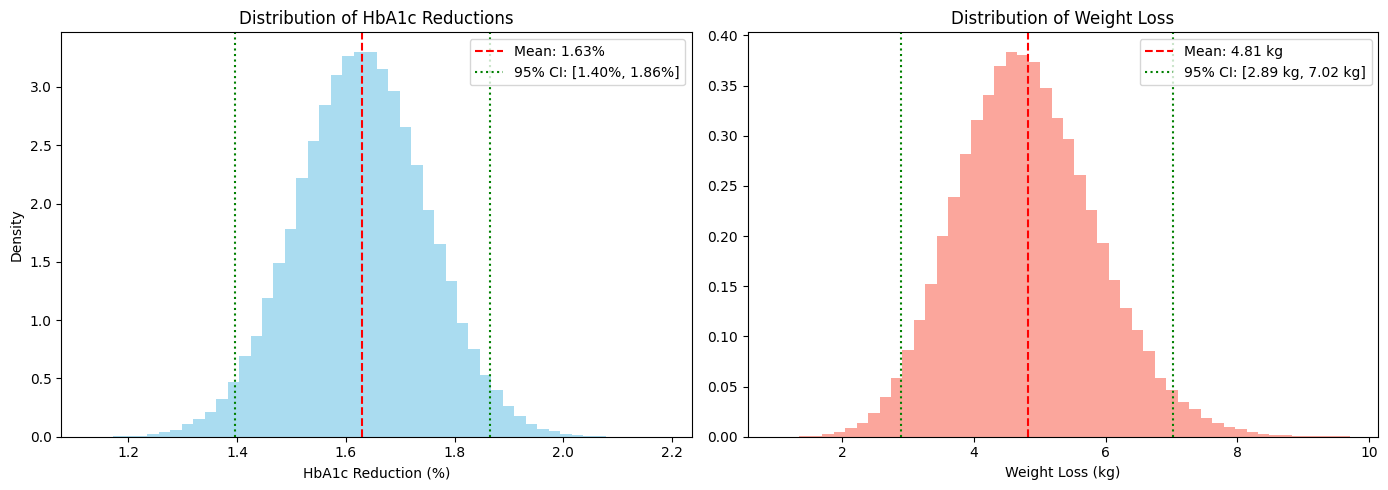

In [5]:

from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# --- Input Parameters (Based on SUSTAIN Trials) ---
# HbA1c Reduction
mean_hba1c_reduction = 1.63    # Mean HbA1c reduction (%)
std_hba1c_reduction = 0.12     # Standard deviation (%)

# Weight Loss
mean_weight_loss_percent = 5.66 # Mean weight loss (% of body weight)
std_weight_loss_percent = 0.72  # Standard deviation (%)

# Patient Demographics
mean_baseline_weight = 85      # Mean baseline weight (kg)
std_baseline_weight = 15       # Standard deviation (kg)
age_threshold = 60             # Age threshold for reduced effect (years)

# Treatment Effects by Subgroup
gender_effect_hba1c = 0      # Additional HbA1c reduction for females (%)
gender_effect_weight = 0     # Additional weight loss for females (%)
age_effect_hba1c = 0        # Reduced HbA1c effect for age > threshold (%)
age_effect_weight = 0       # Reduced weight loss for age > threshold (%)

# Simulation Parameters
n_simulations = 100000         # Number of Monte Carlo iterations

# --- Generate Synthetic Patient Data ---
ages = np.random.randint(18, 80, n_simulations)
genders = np.random.choice(['Male', 'Female'], n_simulations, p=[0.5, 0.5])
baseline_weights = np.random.normal(mean_baseline_weight, std_baseline_weight, n_simulations)

# --- Simulate Treatment Effects ---
# Base effects (before adjustments)
hba1c_reductions = np.random.normal(mean_hba1c_reduction, std_hba1c_reduction, n_simulations)
weight_loss_percent = np.random.normal(mean_weight_loss_percent, std_weight_loss_percent, n_simulations)

# Adjust for demographics
for i in range(n_simulations):
    if ages[i] > age_threshold:
        hba1c_reductions[i] += age_effect_hba1c
        weight_loss_percent[i] += age_effect_weight
    if genders[i] == 'Female':
        hba1c_reductions[i] += gender_effect_hba1c
        weight_loss_percent[i] += gender_effect_weight

# Convert weight loss from % to kg
weight_loss_kg = (weight_loss_percent / 100) * baseline_weights

# --- Calculate Key Statistics ---
# HbA1c Reduction
mean_hba1c = np.mean(hba1c_reductions)
ci_hba1c = np.percentile(hba1c_reductions, [2.5, 97.5])  # 95% CI

# Weight Loss
mean_weight_kg = np.mean(weight_loss_kg)
ci_weight_kg = np.percentile(weight_loss_kg, [2.5, 97.5])

# --- Print Results ---
print("=== Overall Results ===")
print(f"Mean HbA1c reduction: {mean_hba1c:.2f}% (95% CI: [{ci_hba1c[0]:.2f}%, {ci_hba1c[1]:.2f}%])")
print(f"Mean weight loss: {mean_weight_kg:.2f} kg (95% CI: [{ci_weight_kg[0]:.2f} kg, {ci_weight_kg[1]:.2f} kg])")

# --- Subgroup Analysis ---
def subgroup_analysis(data, condition, name):
    subgroup_data = data[condition]
    mean = np.mean(subgroup_data)
    ci = np.percentile(subgroup_data, [2.5, 97.5])
    print(f"{name}: {mean:.2f} (95% CI: [{ci[0]:.2f}, {ci[1]:.2f}])")

print("\n=== Subgroup Analysis ===")
print("\nHbA1c Reduction (%):")
subgroup_analysis(hba1c_reductions, genders == 'Male', "  - Males")
subgroup_analysis(hba1c_reductions, genders == 'Female', "  - Females")
subgroup_analysis(hba1c_reductions, ages > age_threshold, f"  - Age > {age_threshold}")
subgroup_analysis(hba1c_reductions, ages <= age_threshold, f"  - Age ≤ {age_threshold}")

print("\nWeight Loss (kg):")
subgroup_analysis(weight_loss_kg, genders == 'Male', "  - Males")
subgroup_analysis(weight_loss_kg, genders == 'Female', "  - Females")
subgroup_analysis(weight_loss_kg, ages > age_threshold, f"  - Age > {age_threshold}")
subgroup_analysis(weight_loss_kg, ages <= age_threshold, f"  - Age ≤ {age_threshold}")

# --- Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# HbA1c Reduction Distribution
ax1.hist(hba1c_reductions, bins=50, density=True, alpha=0.7, color='skyblue')
ax1.axvline(mean_hba1c, color='red', linestyle='--', label=f'Mean: {mean_hba1c:.2f}%')
ax1.axvline(ci_hba1c[0], color='green', linestyle=':', label=f'95% CI: [{ci_hba1c[0]:.2f}%, {ci_hba1c[1]:.2f}%]')
ax1.axvline(ci_hba1c[1], color='green', linestyle=':')
ax1.set_xlabel('HbA1c Reduction (%)')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of HbA1c Reductions')
ax1.legend()

# Weight Loss Distribution
ax2.hist(weight_loss_kg, bins=50, density=True, alpha=0.7, color='salmon')
ax2.axvline(mean_weight_kg, color='red', linestyle='--', label=f'Mean: {mean_weight_kg:.2f} kg')
ax2.axvline(ci_weight_kg[0], color='green', linestyle=':', label=f'95% CI: [{ci_weight_kg[0]:.2f} kg, {ci_weight_kg[1]:.2f} kg]')
ax2.axvline(ci_weight_kg[1], color='green', linestyle=':')
ax2.set_xlabel('Weight Loss (kg)')
ax2.set_title('Distribution of Weight Loss')
ax2.legend()

plt.tight_layout()
plt.show()

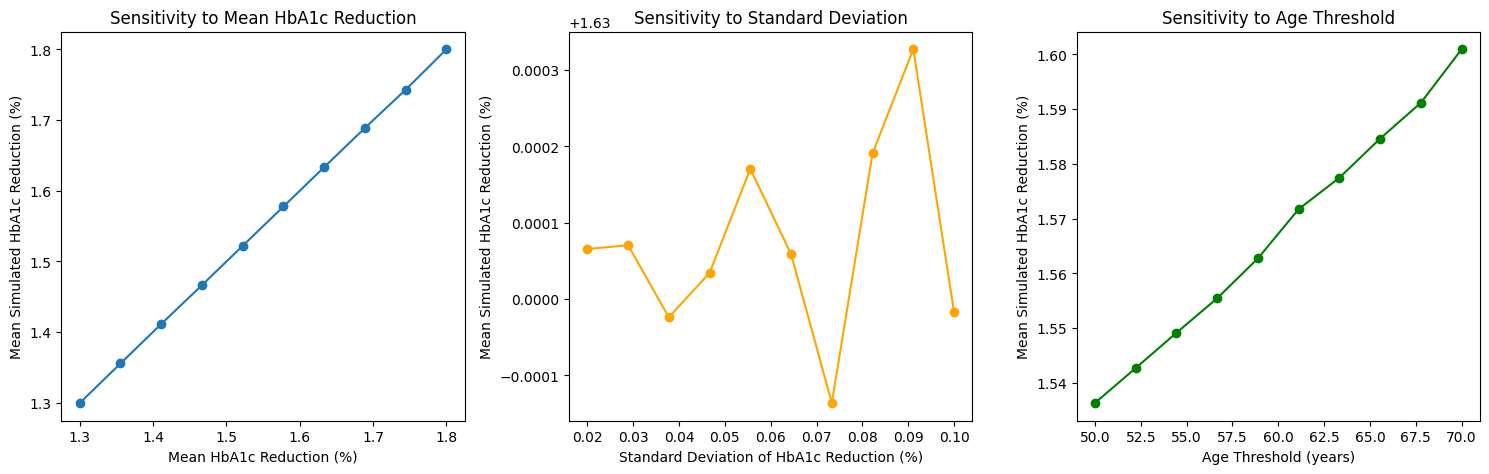

**Sensitivity Analysis**

Running simulations for all models...


100%|██████████| 4/4 [00:00<00:00, 17.26it/s]



Running sensitivity analysis...


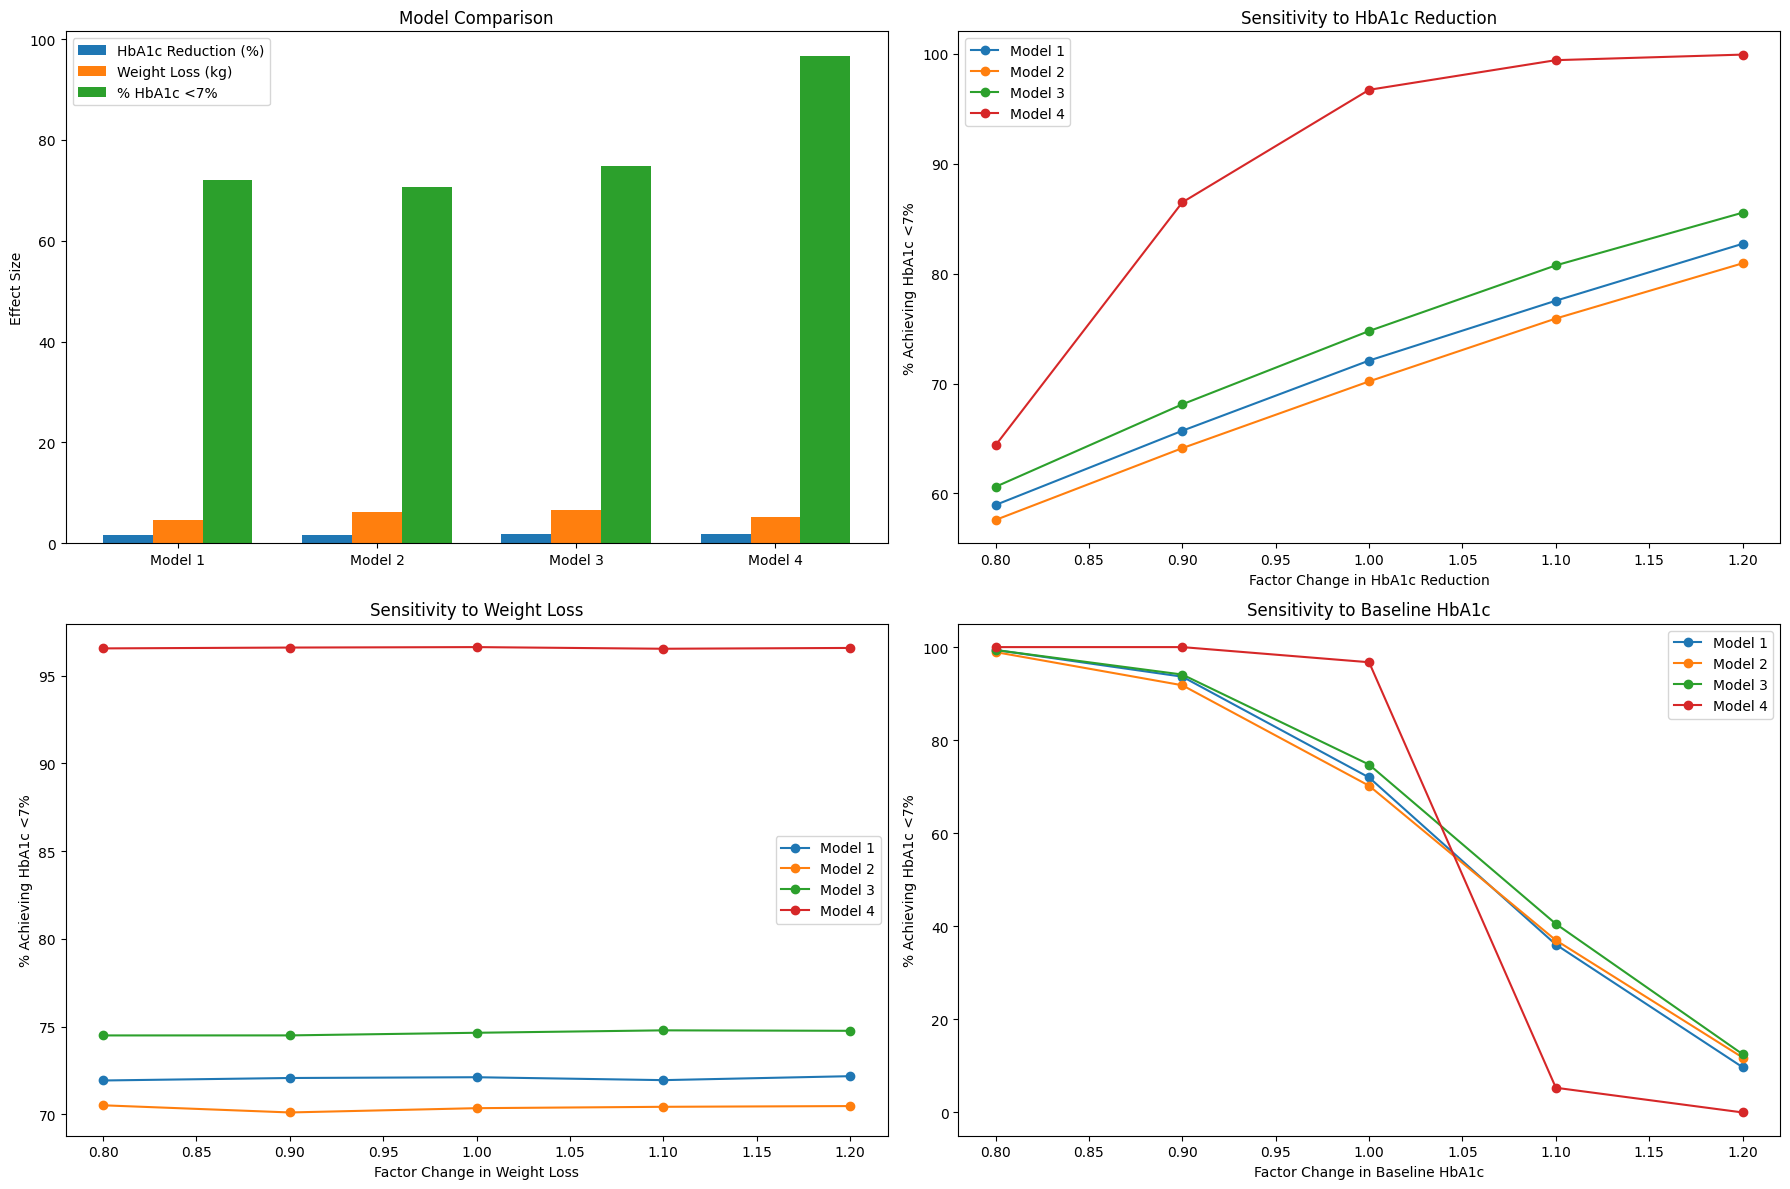


=== Model Results Summary ===

Model 1:
HbA1c Reduction: 1.55% (95% CI: 1.36% to 1.74%)
Weight Loss: 4.53kg (95% CI: 3.72kg to 5.34kg)
% Achieving HbA1c <7%: 72.0% (95% CI: 0.0% to 100.0%)

Model 2:
HbA1c Reduction: 1.60% (95% CI: 1.42% to 1.78%)
Weight Loss: 6.10kg (95% CI: 5.08kg to 7.12kg)
% Achieving HbA1c <7%: 70.6% (95% CI: 0.0% to 100.0%)

Model 3:
HbA1c Reduction: 1.80% (95% CI: 1.68% to 1.92%)
Weight Loss: 6.50kg (95% CI: 5.97kg to 7.03kg)
% Achieving HbA1c <7%: 74.8% (95% CI: 0.0% to 100.0%)

Model 4:
HbA1c Reduction: 1.75% (95% CI: 1.44% to 2.07%)
Weight Loss: 5.18kg (95% CI: 4.30kg to 6.06kg)
% Achieving HbA1c <7%: 96.7% (95% CI: 0.0% to 100.0%)


In [17]:
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)

# --- Define the 4 Models ---
models = {
    "Model 1": {
        'mean_baseline_hba1c': 8.05,
        'std_baseline_hba1c': 0.85,
        'mean_hba1c_reduction': 1.55,
        'std_hba1c_reduction': 0.097,
        'mean_weight_loss_kg': 4.53,
        'std_weight_loss_kg': 0.413,
        'mean_baseline_weight': 91.93,
        'std_baseline_weight': 23.83
    },
    "Model 2": {
        'mean_baseline_hba1c': 8.1,
        'std_baseline_hba1c': 0.93,
        'mean_hba1c_reduction': 1.6,
        'std_hba1c_reduction': 0.09,
        'mean_weight_loss_kg': 6.1,
        'std_weight_loss_kg': 0.52,
        'mean_baseline_weight': 89.5,
        'std_baseline_weight': 20.3
    },
    "Model 3": {
        'mean_baseline_hba1c': 8.2,
        'std_baseline_hba1c': 0.9,
        'mean_hba1c_reduction': 1.8,
        'std_hba1c_reduction': 0.06,
        'mean_weight_loss_kg': 6.5,
        'std_weight_loss_kg': 0.27,
        'mean_baseline_weight': 95.8,
        'std_baseline_weight': 21.3
    },
    "Model 4": {
        'mean_baseline_hba1c': 8.31,
        'std_baseline_hba1c': 0.18,
        'mean_hba1c_reduction': 1.75,
        'std_hba1c_reduction': 0.16,
        'mean_weight_loss_kg': 5.18,
        'std_weight_loss_kg': 0.45,
        'mean_baseline_weight': 92.3,
        'std_baseline_weight': 2.54
    }
}

# --- Simulation Function ---
def run_model(params, n_simulations=100000):
    """Run Monte Carlo simulation for a given model"""
    baseline_hba1c = np.random.normal(params['mean_baseline_hba1c'],
                                    params['std_baseline_hba1c'],
                                    n_simulations)
    baseline_weights = np.random.normal(params['mean_baseline_weight'],
                                      params['std_baseline_weight'],
                                      n_simulations)

    hba1c_reductions = np.random.normal(params['mean_hba1c_reduction'],
                                      params['std_hba1c_reduction'],
                                      n_simulations)
    final_hba1c = baseline_hba1c - hba1c_reductions

    weight_loss_kg = np.random.normal(params['mean_weight_loss_kg'],
                                    params['std_weight_loss_kg'],
                                    n_simulations)
    weight_loss_kg = np.minimum(weight_loss_kg, baseline_weights)

    return {
        'mean_hba1c_red': np.mean(hba1c_reductions),
        'hba1c_red_ci': np.percentile(hba1c_reductions, [2.5, 97.5]),
        'mean_weight_loss': np.mean(weight_loss_kg),
        'weight_loss_ci': np.percentile(weight_loss_kg, [2.5, 97.5]),
        'prop_under_7': np.mean(final_hba1c < 7.0) * 100,
        'prop_under_7_ci': np.percentile((final_hba1c < 7.0) * 100, [2.5, 97.5])
    }

# --- Run All Models ---
print("Running simulations for all models...")
results = {}
for model_name, params in tqdm(models.items()):
    results[model_name] = run_model(params)

# --- Sensitivity Analysis: Parameter Impacts ---
print("\nRunning sensitivity analysis...")
sensitivity_results = {
    'hba1c_reduction': [],
    'weight_loss': [],
    'baseline_hba1c': []
}

# Test range for each parameter
test_range = np.linspace(0.8, 1.2, 5)  # Test ±20% variation

for model_name, params in models.items():
    # Sensitivity to HbA1c reduction
    original = params['mean_hba1c_reduction']
    for factor in test_range:
        modified_params = params.copy()
        modified_params['mean_hba1c_reduction'] = original * factor
        res = run_model(modified_params, 50000)
        sensitivity_results['hba1c_reduction'].append({
            'model': model_name,
            'factor': factor,
            'prop_under_7': res['prop_under_7']
        })

    # Sensitivity to weight loss
    original = params['mean_weight_loss_kg']
    for factor in test_range:
        modified_params = params.copy()
        modified_params['mean_weight_loss_kg'] = original * factor
        res = run_model(modified_params, 50000)
        sensitivity_results['weight_loss'].append({
            'model': model_name,
            'factor': factor,
            'prop_under_7': res['prop_under_7']
        })

    # Sensitivity to baseline HbA1c
    original = params['mean_baseline_hba1c']
    for factor in test_range:
        modified_params = params.copy()
        modified_params['mean_baseline_hba1c'] = original * factor
        res = run_model(modified_params, 50000)
        sensitivity_results['baseline_hba1c'].append({
            'model': model_name,
            'factor': factor,
            'prop_under_7': res['prop_under_7']
        })

# --- Visualization ---
plt.figure(figsize=(18, 12))

# Plot 1: Model Comparison
plt.subplot(2, 2, 1)
x = np.arange(len(models))
width = 0.25

# HbA1c reduction
hba1c_vals = [results[model]['mean_hba1c_red'] for model in models]
plt.bar(x - width, hba1c_vals, width, label='HbA1c Reduction (%)')

# Weight loss
weight_vals = [results[model]['mean_weight_loss'] for model in models]
plt.bar(x, weight_vals, width, label='Weight Loss (kg)')

# % under 7
prop_vals = [results[model]['prop_under_7'] for model in models]
plt.bar(x + width, prop_vals, width, label='% HbA1c <7%')

plt.xticks(x, models.keys())
plt.ylabel('Effect Size')
plt.title('Model Comparison')
plt.legend()

# Plot 2: Sensitivity to HbA1c Reduction
plt.subplot(2, 2, 2)
for model in models:
    model_data = [d for d in sensitivity_results['hba1c_reduction'] if d['model'] == model]
    factors = [d['factor'] for d in model_data]
    props = [d['prop_under_7'] for d in model_data]
    plt.plot(factors, props, 'o-', label=model)
plt.xlabel('Factor Change in HbA1c Reduction')
plt.ylabel('% Achieving HbA1c <7%')
plt.title('Sensitivity to HbA1c Reduction')
plt.legend()

# Plot 3: Sensitivity to Weight Loss
plt.subplot(2, 2, 3)
for model in models:
    model_data = [d for d in sensitivity_results['weight_loss'] if d['model'] == model]
    factors = [d['factor'] for d in model_data]
    props = [d['prop_under_7'] for d in model_data]
    plt.plot(factors, props, 'o-', label=model)
plt.xlabel('Factor Change in Weight Loss')
plt.ylabel('% Achieving HbA1c <7%')
plt.title('Sensitivity to Weight Loss')
plt.legend()

# Plot 4: Sensitivity to Baseline HbA1c
plt.subplot(2, 2, 4)
for model in models:
    model_data = [d for d in sensitivity_results['baseline_hba1c'] if d['model'] == model]
    factors = [d['factor'] for d in model_data]
    props = [d['prop_under_7'] for d in model_data]
    plt.plot(factors, props, 'o-', label=model)
plt.xlabel('Factor Change in Baseline HbA1c')
plt.ylabel('% Achieving HbA1c <7%')
plt.title('Sensitivity to Baseline HbA1c')
plt.legend()

plt.tight_layout()
plt.show()

# --- Print Results ---
print("\n=== Model Results Summary ===")
for model_name, res in results.items():
    print(f"\n{model_name}:")
    print(f"HbA1c Reduction: {res['mean_hba1c_red']:.2f}% (95% CI: {res['hba1c_red_ci'][0]:.2f}% to {res['hba1c_red_ci'][1]:.2f}%)")
    print(f"Weight Loss: {res['mean_weight_loss']:.2f}kg (95% CI: {res['weight_loss_ci'][0]:.2f}kg to {res['weight_loss_ci'][1]:.2f}kg)")
    print(f"% Achieving HbA1c <7%: {res['prop_under_7']:.1f}% (95% CI: {res['prop_under_7_ci'][0]:.1f}% to {res['prop_under_7_ci'][1]:.1f}%)")

**Convergence Analysis**

Running convergence analysis for all models...


100%|██████████| 4/4 [00:00<00:00,  6.21it/s]


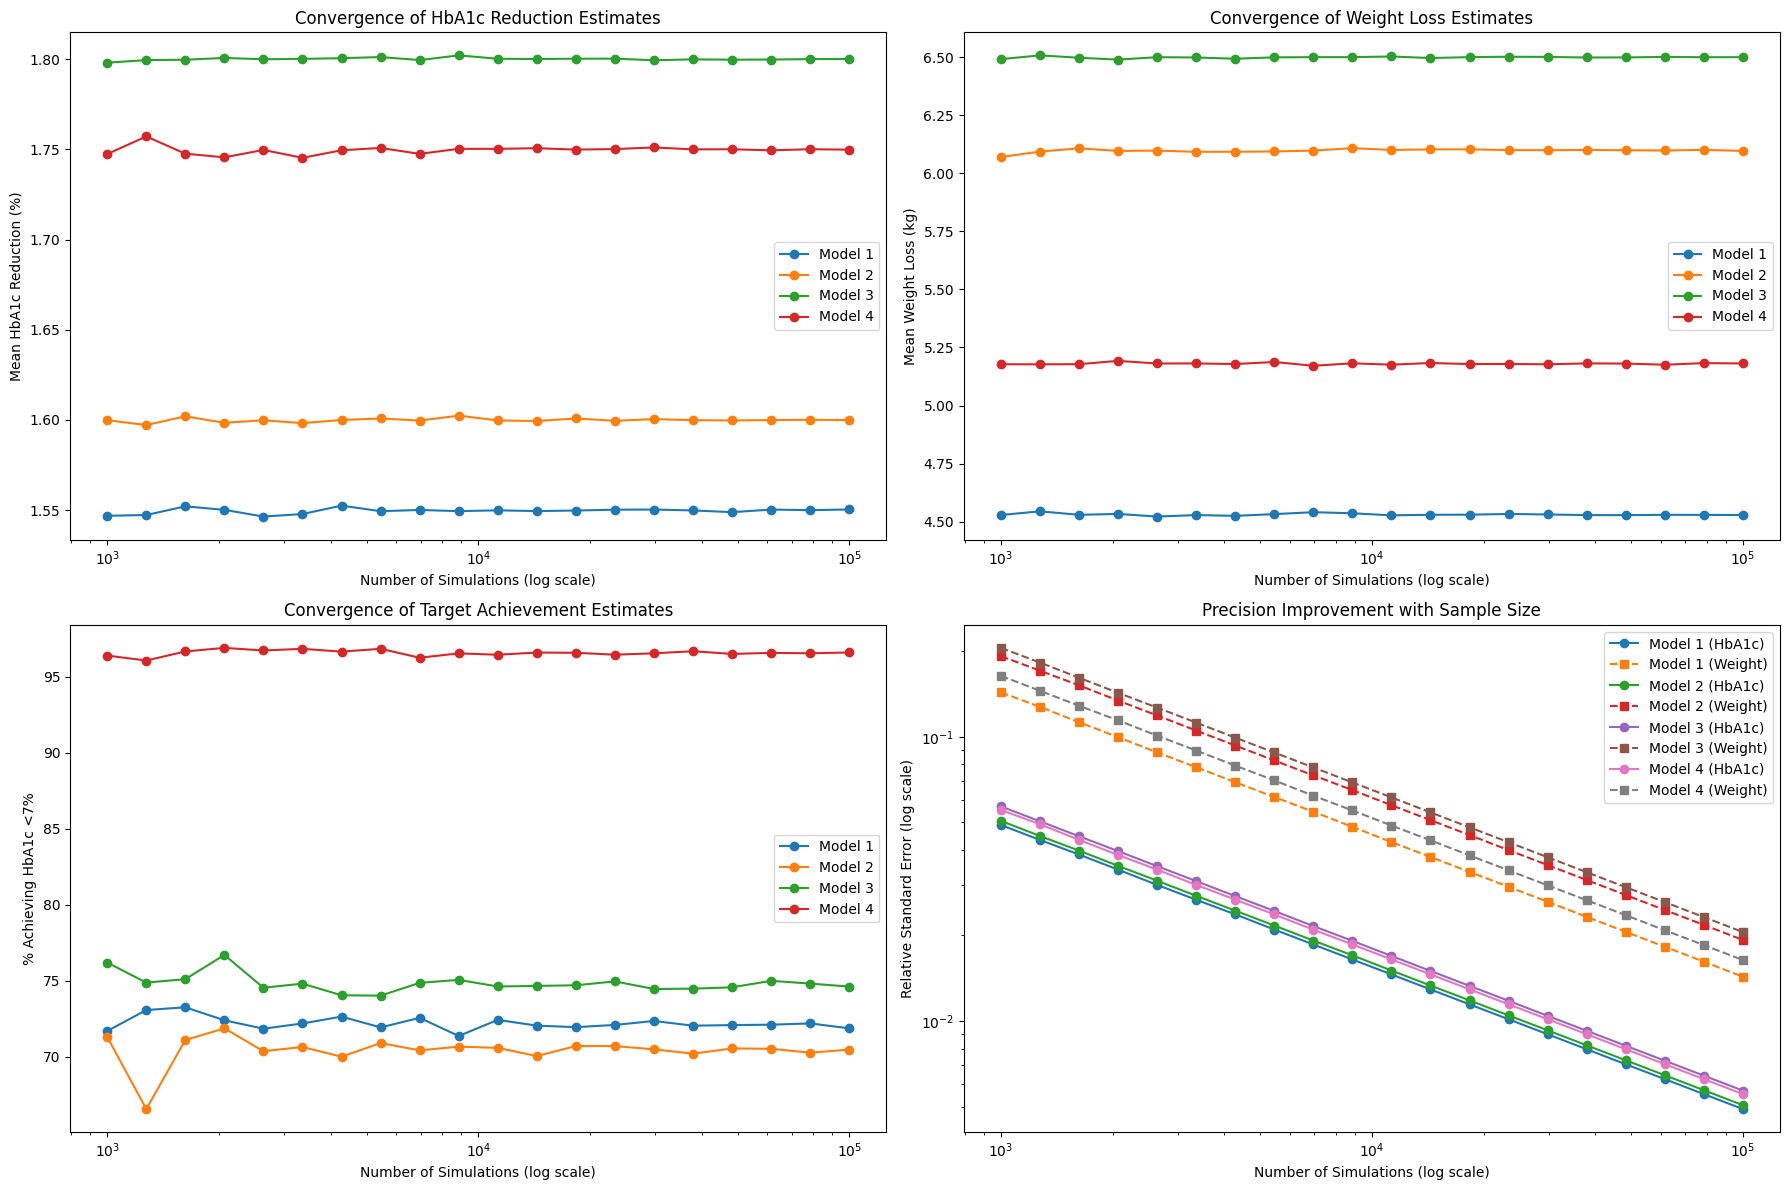


=== Convergence Summary ===

Model 1:
HbA1c reduction: 1.550% (+0.23% from initial)
Weight loss: 4.528kg (-0.00% from initial)
% <7% HbA1c: 71.87% (+0.24% from initial)
Stabilized at ~23,357 simulations

Model 2:
HbA1c reduction: 1.600% (+0.00% from initial)
Weight loss: 6.097kg (+0.43% from initial)
% <7% HbA1c: 70.47% (-1.16% from initial)
Stabilized at ~61,584 simulations

Model 3:
HbA1c reduction: 1.800% (+0.11% from initial)
Weight loss: 6.501kg (+0.13% from initial)
% <7% HbA1c: 74.62% (-2.07% from initial)
Stabilized at ~18,329 simulations

Model 4:
HbA1c reduction: 1.750% (+0.14% from initial)
Weight loss: 5.181kg (+0.07% from initial)
% <7% HbA1c: 96.60% (+0.21% from initial)
Stabilized at ~8,858 simulations


In [19]:


# --- Define the 4 Models ---
models = {
    "Model 1": {
        'mean_baseline_hba1c': 8.05,
        'std_baseline_hba1c': 0.85,
        'mean_hba1c_reduction': 1.55,
        'std_hba1c_reduction': 0.097,
        'mean_weight_loss_kg': 4.53,
        'std_weight_loss_kg': 0.413,
        'mean_baseline_weight': 91.93,
        'std_baseline_weight': 23.83
    },
    "Model 2": {
        'mean_baseline_hba1c': 8.1,
        'std_baseline_hba1c': 0.93,
        'mean_hba1c_reduction': 1.6,
        'std_hba1c_reduction': 0.09,
        'mean_weight_loss_kg': 6.1,
        'std_weight_loss_kg': 0.52,
        'mean_baseline_weight': 89.5,
        'std_baseline_weight': 20.3
    },
    "Model 3": {
        'mean_baseline_hba1c': 8.2,
        'std_baseline_hba1c': 0.9,
        'mean_hba1c_reduction': 1.8,
        'std_hba1c_reduction': 0.06,
        'mean_weight_loss_kg': 6.5,
        'std_weight_loss_kg': 0.27,
        'mean_baseline_weight': 95.8,
        'std_baseline_weight': 21.3
    },
    "Model 4": {
        'mean_baseline_hba1c': 8.31,
        'std_baseline_hba1c': 0.18,
        'mean_hba1c_reduction': 1.75,
        'std_hba1c_reduction': 0.16,
        'mean_weight_loss_kg': 5.18,
        'std_weight_loss_kg': 0.45,
        'mean_baseline_weight': 92.3,
        'std_baseline_weight': 2.54
    }
}

# --- Convergence Analysis Function ---
def run_convergence_test(params, max_simulations=100000, checkpoints=20):
    """Test how results stabilize with increasing sample size"""
    # Logarithmically spaced sample sizes
    sample_sizes = np.logspace(3, np.log10(max_simulations), num=checkpoints).astype(int)

    results = {
        'sample_sizes': sample_sizes,
        'hba1c_red': [],
        'weight_loss': [],
        'prop_under_7': []
    }

    for n in sample_sizes:
        # Run simulation
        baseline_hba1c = np.random.normal(params['mean_baseline_hba1c'],
                                        params['std_baseline_hba1c'],
                                        n)
        baseline_weights = np.random.normal(params['mean_baseline_weight'],
                                          params['std_baseline_weight'],
                                          n)

        hba1c_reductions = np.random.normal(params['mean_hba1c_reduction'],
                                          params['std_hba1c_reduction'],
                                          n)
        final_hba1c = baseline_hba1c - hba1c_reductions

        weight_loss_kg = np.random.normal(params['mean_weight_loss_kg'],
                                        params['std_weight_loss_kg'],
                                        n)
        weight_loss_kg = np.minimum(weight_loss_kg, baseline_weights)

        # Store results
        results['hba1c_red'].append(np.mean(hba1c_reductions))
        results['weight_loss'].append(np.mean(weight_loss_kg))
        results['prop_under_7'].append(np.mean(final_hba1c < 7.0) * 100)

    return results

# --- Run Convergence Tests ---
print("Running convergence analysis for all models...")
convergence_results = {}
for model_name, params in tqdm(models.items()):
    convergence_results[model_name] = run_convergence_test(params)

# --- Visualization ---
plt.figure(figsize=(18, 12))

# Plot 1: HbA1c Reduction Convergence
plt.subplot(2, 2, 1)
for model_name, results in convergence_results.items():
    plt.plot(results['sample_sizes'], results['hba1c_red'], 'o-', label=model_name)
plt.xscale('log')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Mean HbA1c Reduction (%)')
plt.title('Convergence of HbA1c Reduction Estimates')
plt.legend()

# Plot 2: Weight Loss Convergence
plt.subplot(2, 2, 2)
for model_name, results in convergence_results.items():
    plt.plot(results['sample_sizes'], results['weight_loss'], 'o-', label=model_name)
plt.xscale('log')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Mean Weight Loss (kg)')
plt.title('Convergence of Weight Loss Estimates')
plt.legend()

# Plot 3: % Achieving <7% HbA1c Convergence
plt.subplot(2, 2, 3)
for model_name, results in convergence_results.items():
    plt.plot(results['sample_sizes'], results['prop_under_7'], 'o-', label=model_name)
plt.xscale('log')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('% Achieving HbA1c <7%')
plt.title('Convergence of Target Achievement Estimates')
plt.legend()

# Plot 4: Relative Standard Error
plt.subplot(2, 2, 4)
for model_name, results in convergence_results.items():
    # Calculate relative standard error (RSE = SD/mean / sqrt(n))
    rse_hba1c = np.array(results['hba1c_red']) / np.sqrt(results['sample_sizes'])
    plt.plot(results['sample_sizes'], rse_hba1c, 'o-', label=f"{model_name} (HbA1c)")

    rse_weight = np.array(results['weight_loss']) / np.sqrt(results['sample_sizes'])
    plt.plot(results['sample_sizes'], rse_weight, 's--', label=f"{model_name} (Weight)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Relative Standard Error (log scale)')
plt.title('Precision Improvement with Sample Size')
plt.legend()

plt.tight_layout()
plt.show()

# --- Print Convergence Summary ---
print("\n=== Convergence Summary ===")
for model_name, results in convergence_results.items():
    final_hba1c = results['hba1c_red'][-1]
    final_weight = results['weight_loss'][-1]
    final_target = results['prop_under_7'][-1]

    # Calculate % change from first to last estimate
    hba1c_change = 100 * (final_hba1c - results['hba1c_red'][0]) / results['hba1c_red'][0]
    weight_change = 100 * (final_weight - results['weight_loss'][0]) / results['weight_loss'][0]
    target_change = 100 * (final_target - results['prop_under_7'][0]) / results['prop_under_7'][0]

    print(f"\n{model_name}:")
    print(f"HbA1c reduction: {final_hba1c:.3f}% ({hba1c_change:+.2f}% from initial)")
    print(f"Weight loss: {final_weight:.3f}kg ({weight_change:+.2f}% from initial)")
    print(f"% <7% HbA1c: {final_target:.2f}% ({target_change:+.2f}% from initial)")
    print(f"Stabilized at ~{results['sample_sizes'][np.argmin(np.abs(np.diff(results['hba1c_red'])))]:,} simulations")

**Goodness of Fit: Model 4 vs Real Life Data**

=== HbA1c Reduction Comparison ===
Clinical Mean: 1.698% ± 0.150
Simulated Mean: 1.749% ± 0.160

Kolmogorov-Smirnov Test:
D = 0.158, p = 0.000

T-Test:
t = -9.808, p = 0.000

Effect Size (Cohen's d): 0.325 (small effect)

=== Weight Loss Comparison ===
Clinical Mean: 4.091kg ± 0.388
Simulated Mean: 5.177kg ± 0.447

Kolmogorov-Smirnov Test:
D = 0.819, p = 0.000

T-Test:
t = -73.989, p = 0.000

Effect Size (Cohen's d): 2.454 (large effect)


<ipython-input-25-27f455b08e60>:83: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([clinical_reductions, simulated_reductions],
<ipython-input-25-27f455b08e60>:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([clinical_weight_loss, simulated_weight_loss],


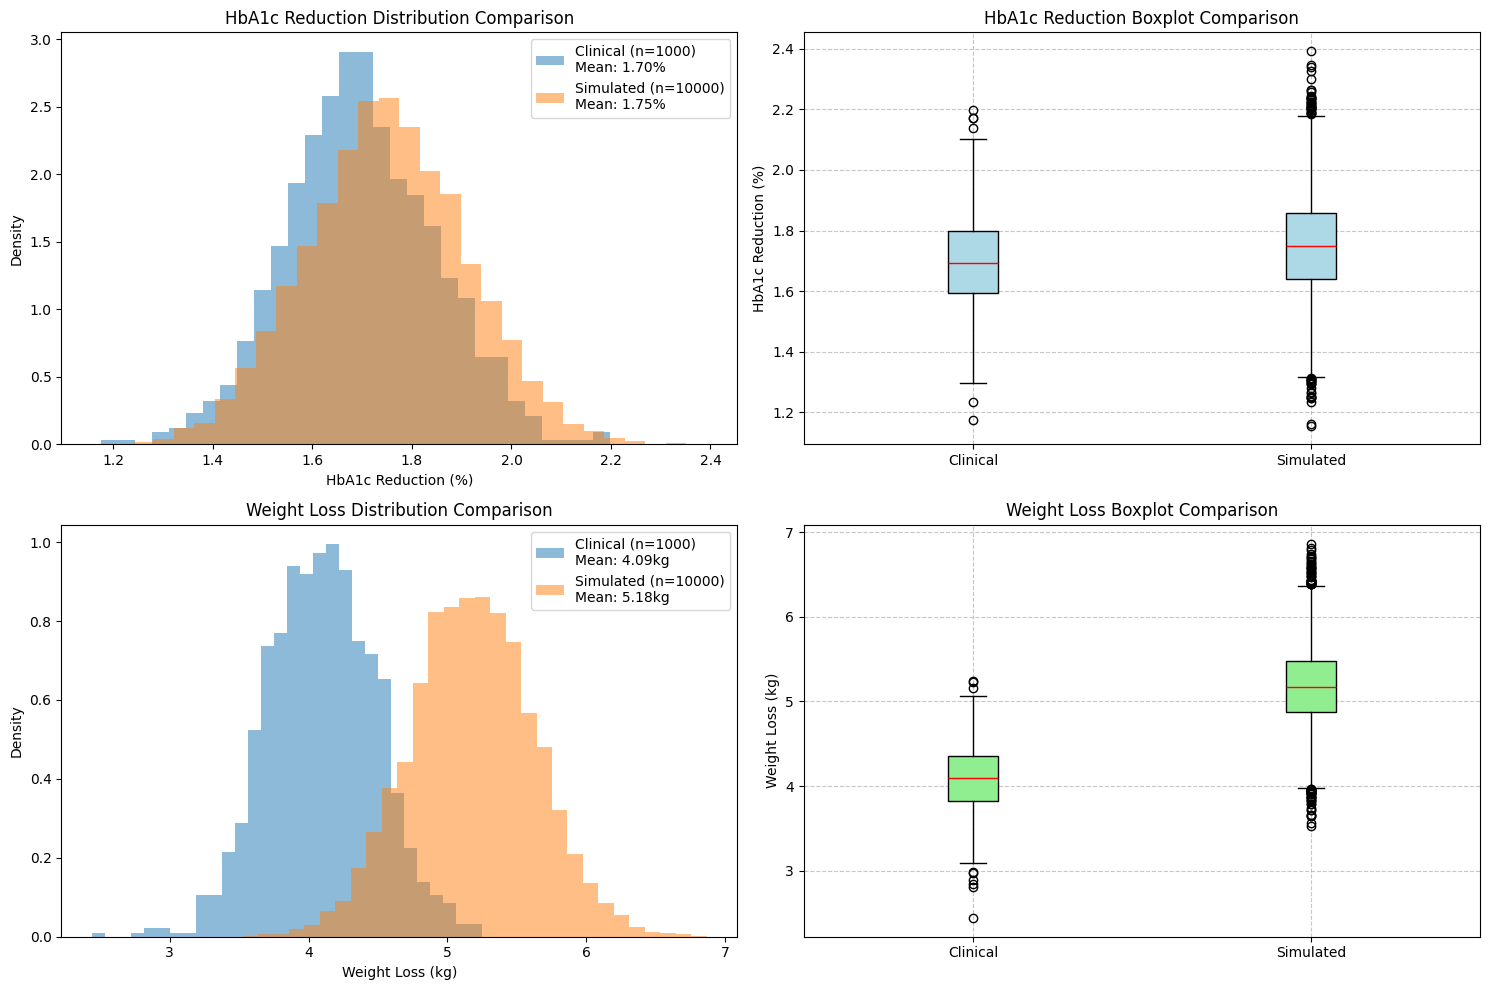

In [25]:

from scipy.stats import ks_2samp, ttest_ind

# Set Model 4 Parameters
params = {
    'mean_baseline_hba1c': 8.31,
    'std_baseline_hba1c': 0.18,
    'mean_hba1c_reduction': 1.75,
    'std_hba1c_reduction': 0.16,
    'mean_weight_loss_kg': 5.18,
    'std_weight_loss_kg': 0.45,
    'mean_baseline_weight': 92.3,
    'std_baseline_weight': 2.54
}

# Generate synthetic clinical data (mean reductions and weight loss)
clinical_reductions = np.random.normal(1.70, 0.15, 1000)  # Example clinical trial HbA1c data
clinical_weight_loss = np.random.normal(4.1, 0.4, 1000)    # Example clinical trial weight loss data

# Simulation functions
def simulate_hba1c_reductions(params, n_simulations):
    return np.random.normal(params['mean_hba1c_reduction'],
                          params['std_hba1c_reduction'],
                          n_simulations)

def simulate_weight_loss(params, n_simulations):
    return np.random.normal(params['mean_weight_loss_kg'],
                          params['std_weight_loss_kg'],
                          n_simulations)

# Run simulations
simulated_reductions = simulate_hba1c_reductions(params, 10000)
simulated_weight_loss = simulate_weight_loss(params, 10000)

# Statistical tests for HbA1c
ks_test_hba1c = ks_2samp(clinical_reductions, simulated_reductions)
t_test_hba1c = ttest_ind(clinical_reductions, simulated_reductions)

# Statistical tests for weight loss
ks_test_weight = ks_2samp(clinical_weight_loss, simulated_weight_loss)
t_test_weight = ttest_ind(clinical_weight_loss, simulated_weight_loss)

# Effect size calculation
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

d_hba1c = cohens_d(clinical_reductions, simulated_reductions)
d_weight = cohens_d(clinical_weight_loss, simulated_weight_loss)

# Print results
print("=== HbA1c Reduction Comparison ===")
print(f"Clinical Mean: {np.mean(clinical_reductions):.3f}% ± {np.std(clinical_reductions):.3f}")
print(f"Simulated Mean: {np.mean(simulated_reductions):.3f}% ± {np.std(simulated_reductions):.3f}")
print(f"\nKolmogorov-Smirnov Test:\nD = {ks_test_hba1c.statistic:.3f}, p = {ks_test_hba1c.pvalue:.3f}")
print(f"\nT-Test:\nt = {t_test_hba1c.statistic:.3f}, p = {t_test_hba1c.pvalue:.3f}")
print(f"\nEffect Size (Cohen's d): {abs(d_hba1c):.3f} ({'small' if abs(d_hba1c) < 0.5 else 'medium' if abs(d_hba1c) < 0.8 else 'large'} effect)")

print("\n=== Weight Loss Comparison ===")
print(f"Clinical Mean: {np.mean(clinical_weight_loss):.3f}kg ± {np.std(clinical_weight_loss):.3f}")
print(f"Simulated Mean: {np.mean(simulated_weight_loss):.3f}kg ± {np.std(simulated_weight_loss):.3f}")
print(f"\nKolmogorov-Smirnov Test:\nD = {ks_test_weight.statistic:.3f}, p = {ks_test_weight.pvalue:.3f}")
print(f"\nT-Test:\nt = {t_test_weight.statistic:.3f}, p = {t_test_weight.pvalue:.3f}")
print(f"\nEffect Size (Cohen's d): {abs(d_weight):.3f} ({'small' if abs(d_weight) < 0.5 else 'medium' if abs(d_weight) < 0.8 else 'large'} effect)")

# Visualization
plt.figure(figsize=(15, 10))

# HbA1c Distribution plot
plt.subplot(2, 2, 1)
plt.hist(clinical_reductions, bins=30, alpha=0.5, density=True,
         label=f'Clinical (n=1000)\nMean: {np.mean(clinical_reductions):.2f}%')
plt.hist(simulated_reductions, bins=30, alpha=0.5, density=True,
         label=f'Simulated (n=10000)\nMean: {np.mean(simulated_reductions):.2f}%')
plt.xlabel('HbA1c Reduction (%)')
plt.ylabel('Density')
plt.title('HbA1c Reduction Distribution Comparison')
plt.legend()

# HbA1c Boxplot
plt.subplot(2, 2, 2)
plt.boxplot([clinical_reductions, simulated_reductions],
            labels=['Clinical', 'Simulated'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))
plt.ylabel('HbA1c Reduction (%)')
plt.title('HbA1c Reduction Boxplot Comparison')
plt.grid(True, linestyle='--', alpha=0.7)

# Weight Loss Distribution plot
plt.subplot(2, 2, 3)
plt.hist(clinical_weight_loss, bins=30, alpha=0.5, density=True,
         label=f'Clinical (n=1000)\nMean: {np.mean(clinical_weight_loss):.2f}kg')
plt.hist(simulated_weight_loss, bins=30, alpha=0.5, density=True,
         label=f'Simulated (n=10000)\nMean: {np.mean(simulated_weight_loss):.2f}kg')
plt.xlabel('Weight Loss (kg)')
plt.ylabel('Density')
plt.title('Weight Loss Distribution Comparison')
plt.legend()

# Weight Loss Boxplot
plt.subplot(2, 2, 4)
plt.boxplot([clinical_weight_loss, simulated_weight_loss],
            labels=['Clinical', 'Simulated'],
            patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='red'))
plt.ylabel('Weight Loss (kg)')
plt.title('Weight Loss Boxplot Comparison')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Parameter Uncertainty Analysis**

<ipython-input-28-3302bd2bfab6>:19: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)


=== HbA1c Reduction Sensitivity ===


/usr/local/lib/python3.11/dist-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


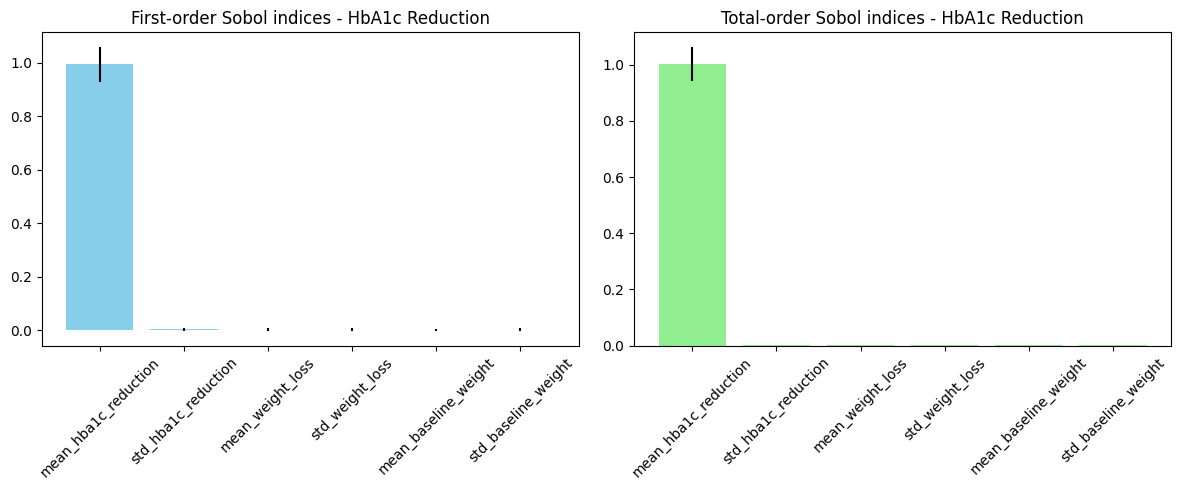


=== Weight Loss Sensitivity ===


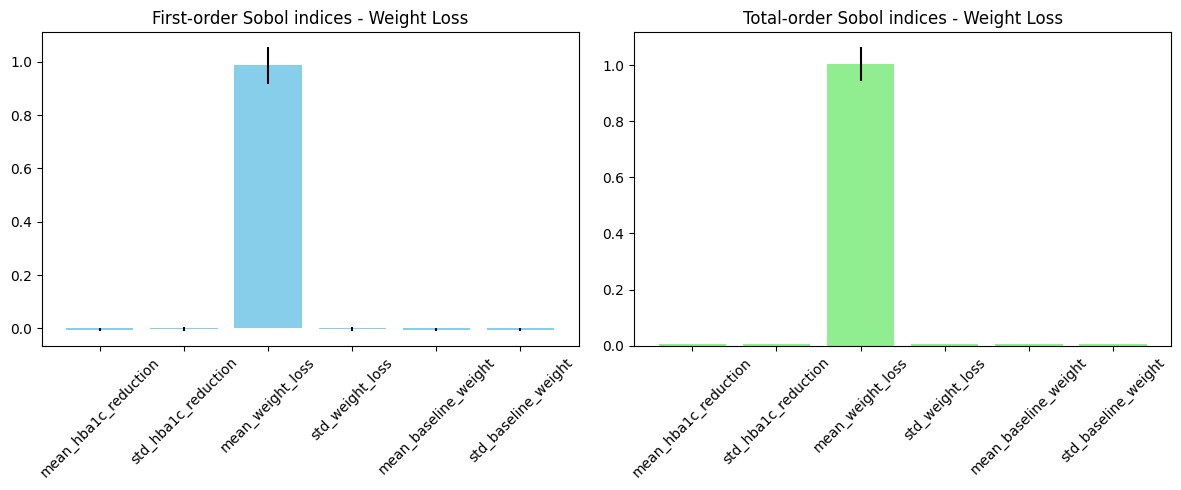


=== Final Weight Sensitivity ===


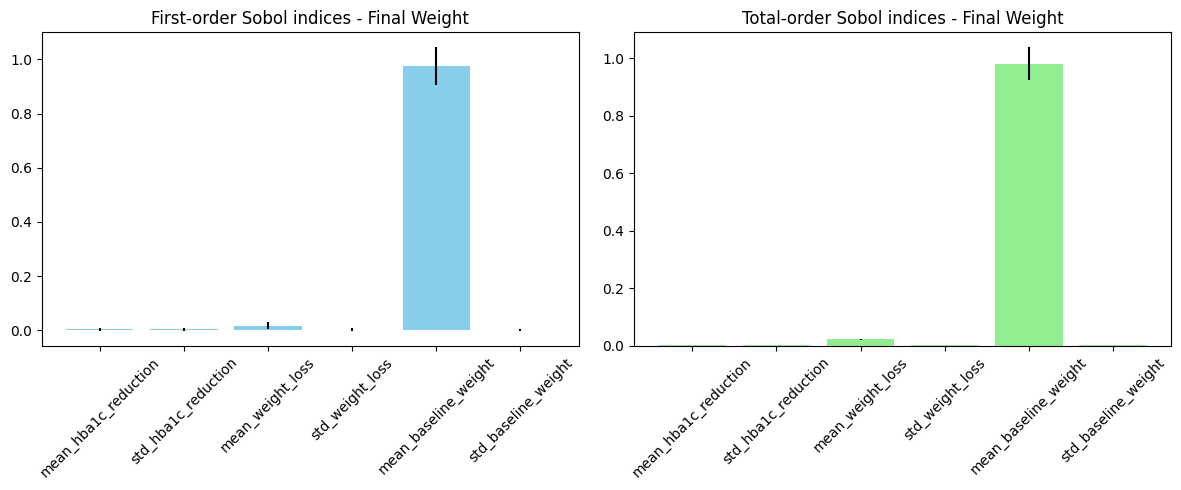

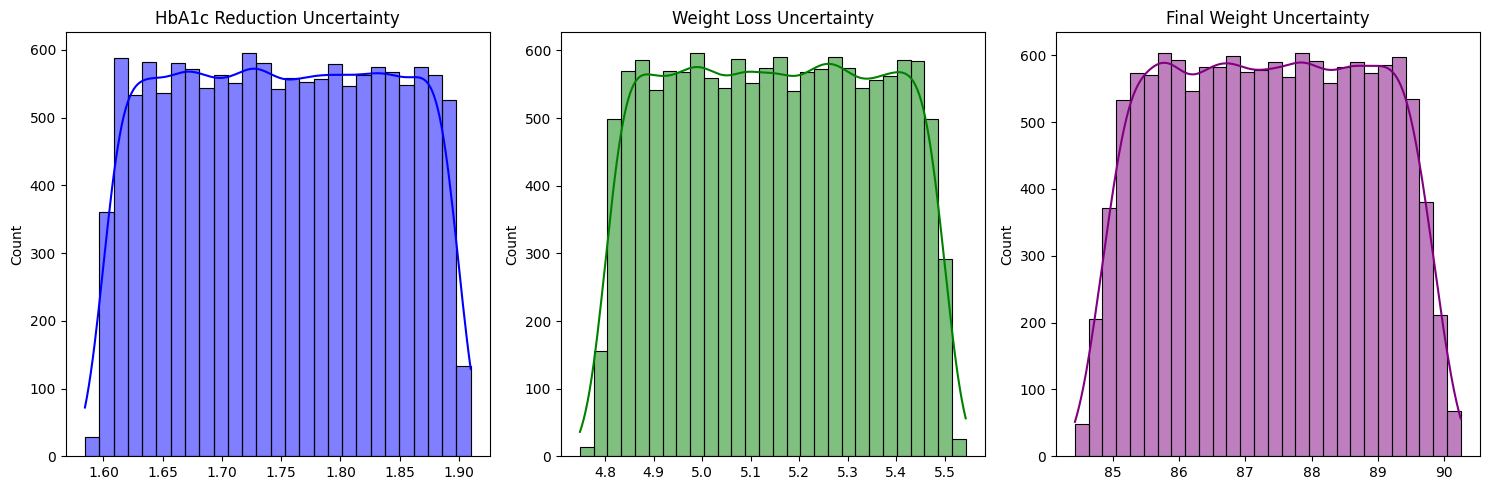

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from SALib.analyze import sobol
from SALib.sample import saltelli

# Set up the parameter ranges for uncertainty analysis
problem = {
    'num_vars': 6,
    'names': ['mean_hba1c_reduction', 'std_hba1c_reduction',
              'mean_weight_loss', 'std_weight_loss',
              'mean_baseline_weight', 'std_baseline_weight'],
    'bounds': [[1.6, 1.9], [0.1, 0.2], [4.8, 5.5],
               [0.3, 0.6], [90.0, 95.0], [2.0, 3.0]]
}

# Generate samples using Saltelli's method
param_values = saltelli.sample(problem, 1000)

# Modified simulation function that returns arrays
def model_run(params, n_patients=1000):
    hba1c_reductions = np.random.normal(params[0], params[1], n_patients)
    weight_loss = np.random.normal(params[2], params[3], n_patients)
    baseline_weight = np.random.normal(params[4], params[5], n_patients)
    final_weight = baseline_weight - weight_loss

    # Return as tuple instead of dict
    return (
        np.mean(hba1c_reductions),  # index 0
        np.mean(weight_loss),       # index 1
        np.mean(final_weight)       # index 2
    )

# Run simulations and store outputs in a 2D array
Y = np.array([model_run(v) for v in param_values])

# Now this will work correctly
hba1c_means = Y[:, 0]  # All HbA1c means
weight_loss_means = Y[:, 1]  # All weight loss means
final_weight_means = Y[:, 2]  # All final weight means

# Sobol sensitivity analysis function
def sobol_analysis(output, output_name):
    Si = sobol.analyze(problem, output, print_to_console=False)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # First-order indices
    ax1.bar(problem['names'], Si['S1'], yerr=Si['S1_conf'], color='skyblue')
    ax1.set_title(f'First-order Sobol indices - {output_name}')
    ax1.tick_params(axis='x', rotation=45)

    # Total-order indices
    ax2.bar(problem['names'], Si['ST'], yerr=Si['ST_conf'], color='lightgreen')
    ax2.set_title(f'Total-order Sobol indices - {output_name}')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
    return Si

# Run analyses
print("=== HbA1c Reduction Sensitivity ===")
sobol_hba1c = sobol_analysis(hba1c_means, "HbA1c Reduction")

print("\n=== Weight Loss Sensitivity ===")
sobol_weight = sobol_analysis(weight_loss_means, "Weight Loss")

print("\n=== Final Weight Sensitivity ===")
sobol_final = sobol_analysis(final_weight_means, "Final Weight")

# Uncertainty distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(hba1c_means, kde=True, color='blue')
plt.title('HbA1c Reduction Uncertainty')

plt.subplot(1, 3, 2)
sns.histplot(weight_loss_means, kde=True, color='green')
plt.title('Weight Loss Uncertainty')

plt.subplot(1, 3, 3)
sns.histplot(final_weight_means, kde=True, color='purple')
plt.title('Final Weight Uncertainty')

plt.tight_layout()
plt.show()

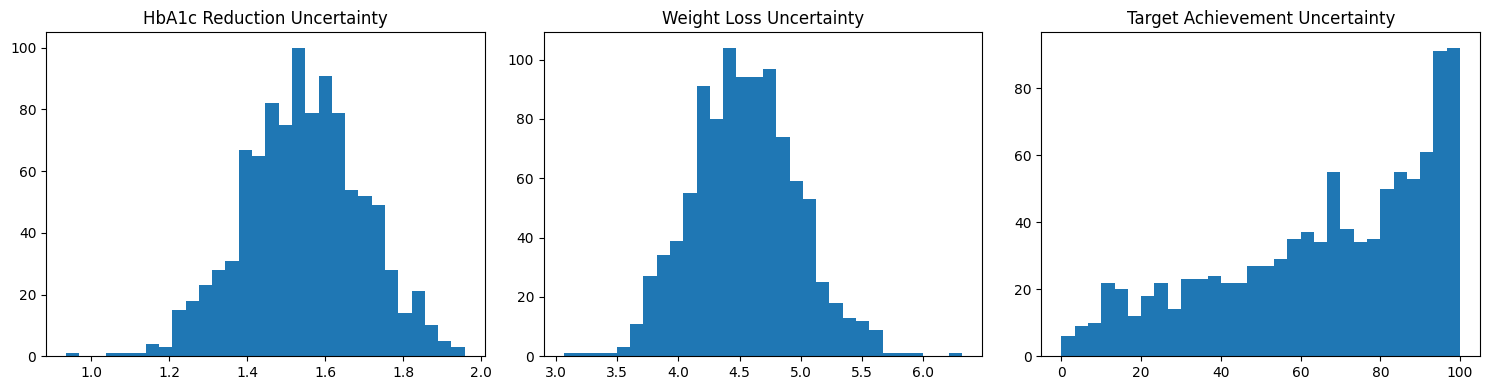

In [29]:
def parameter_uncertainty_analysis(model_params, n_runs=1000):
    results = {'hba1c': [], 'weight': [], 'target': []}

    for _ in range(n_runs):
        # Add random noise to parameters (±10%)
        noisy_params = {
            k: np.random.normal(v, 0.1*v)
            for k, v in model_params.items()
            if 'mean_' in k
        }

        # Run simulation
        res = run_model({**model_params, **noisy_params}, 10000)

        results['hba1c'].append(res['mean_hba1c_red'])
        results['weight'].append(res['mean_weight_loss'])
        results['target'].append(res['prop_under_7'])

    return results

uncertainty_results = parameter_uncertainty_analysis(models["Model 1"])

# Plot results
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.hist(uncertainty_results['hba1c'], bins=30)
plt.title('HbA1c Reduction Uncertainty')

plt.subplot(1,3,2)
plt.hist(uncertainty_results['weight'], bins=30)
plt.title('Weight Loss Uncertainty')

plt.subplot(1,3,3)
plt.hist(uncertainty_results['target'], bins=30)
plt.title('Target Achievement Uncertainty')
plt.tight_layout()
plt.show()

**Scenario Analysis**

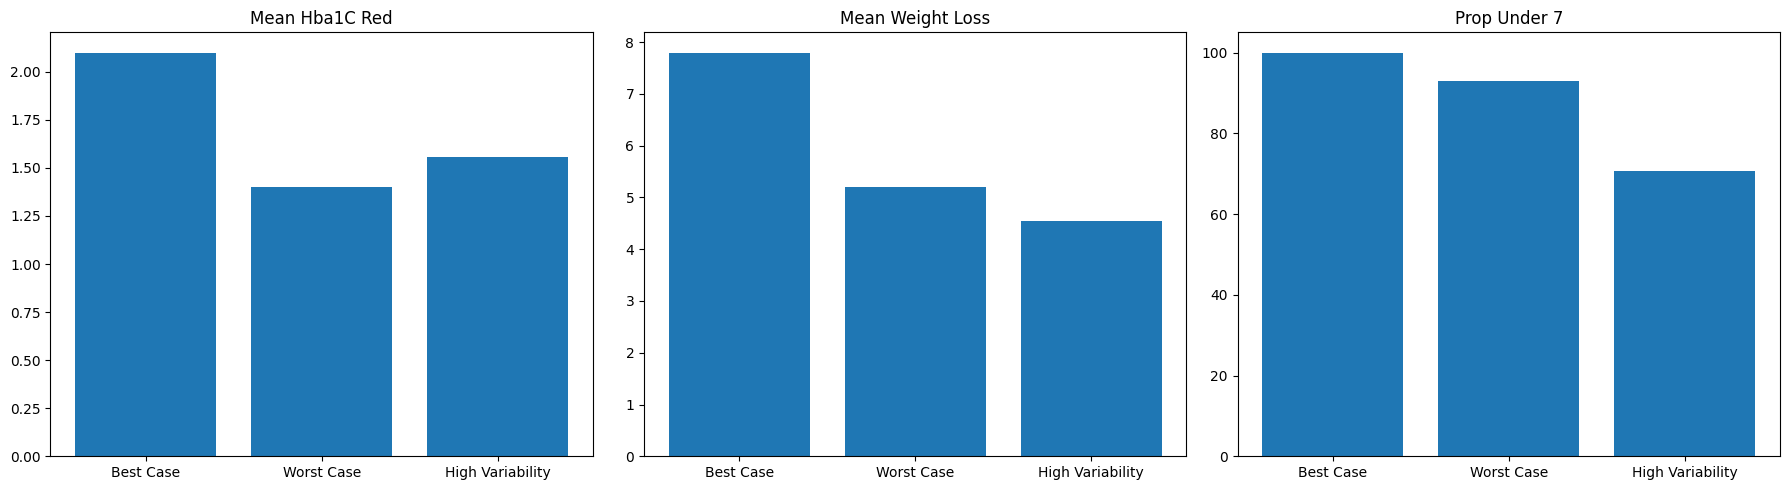

In [32]:
scenarios = {
    "Best Case": {
        'mean_hba1c_reduction': 1.75 * 1.2,  # 20% better
        'mean_weight_loss_kg': 6.5 * 1.2,
        'std_baseline_hba1c': 0.18 * 0.8     # 20% less variability
    },
    "Worst Case": {
        'mean_hba1c_reduction': 1.75 * 0.8,
        'mean_weight_loss_kg': 6.5 * 0.8,
        'std_baseline_hba1c': 0.18 * 1.2
    },
    "High Variability": {
        'std_hba1c_reduction': 0.16 * 2,
        'std_weight_loss_kg': 0.45 * 2
    }
}

scenario_results = {}
for name, mods in scenarios.items():
    params = {**models["Model 1"], **mods}
    scenario_results[name] = run_model(params)

# Plot comparison
metrics = ['mean_hba1c_red', 'mean_weight_loss', 'prop_under_7']
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, metric in zip(axes, metrics):
    ax.bar(scenario_results.keys(), [res[metric] for res in scenario_results.values()])
    ax.set_title(metric.replace('_', ' ').title())
plt.tight_layout()
plt.show()

**Value of Information Analysis**

In [34]:
def value_of_information(models, n_simulations=10000):
    vois = []
    params_to_test = ['mean_hba1c_reduction', 'mean_weight_loss_kg', 'std_baseline_hba1c']

    for param in params_to_test:
        # Get current uncertainty range
        original_range = np.percentile([
            np.random.normal(models["Model 4"][param], 0.1*models["Model 4"][param])
            for _ in range(1000)
        ], [2.5, 97.5])

        # Simulate perfect knowledge
        perfect_knowledge = []
        for _ in range(100):
            fixed_params = models["Model 4"].copy()
            fixed_params[param] = np.random.normal(models["Model 4"][param], 0.01*models["Model 4"][param])
            perfect_knowledge.append(run_model(fixed_params, n_simulations)['prop_under_7'])

        # Compare to current uncertainty
        voi = np.std(perfect_knowledge) / np.std(original_range)
        vois.append((param, voi))

    return vois

voi_results = value_of_information(models)
print("\nValue of Information Analysis:")
for param, voi in voi_results:
    print(f"{param:>20}: {voi:.3f}")


Value of Information Analysis:
mean_hba1c_reduction: 1.648
 mean_weight_loss_kg: 0.183
  std_baseline_hba1c: 5.493


**Threshold Analysis**

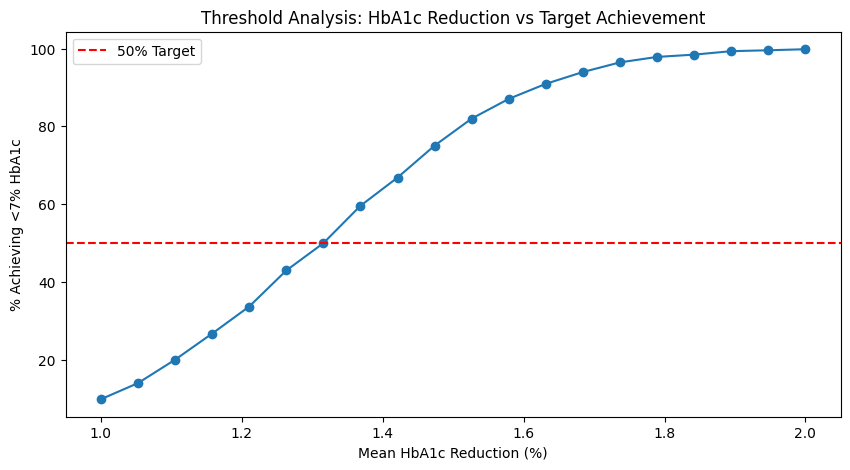

In [35]:
def threshold_analysis(model_params, param, test_range):
    outcomes = []
    for val in test_range:
        modified_params = model_params.copy()
        modified_params[param] = val
        res = run_model(modified_params, 10000)
        outcomes.append(res['prop_under_7'])
    return outcomes

# Example for HbA1c reduction
hba1c_range = np.linspace(1.0, 2.0, 20)
target_rates = threshold_analysis(models["Model 4"], 'mean_hba1c_reduction', hba1c_range)

plt.figure(figsize=(10,5))
plt.plot(hba1c_range, target_rates, 'o-')
plt.axhline(50, color='red', linestyle='--', label='50% Target')
plt.xlabel('Mean HbA1c Reduction (%)')
plt.ylabel('% Achieving <7% HbA1c')
plt.title('Threshold Analysis: HbA1c Reduction vs Target Achievement')
plt.legend()
plt.show()

**Probabilistic Sensitivity Analysis**

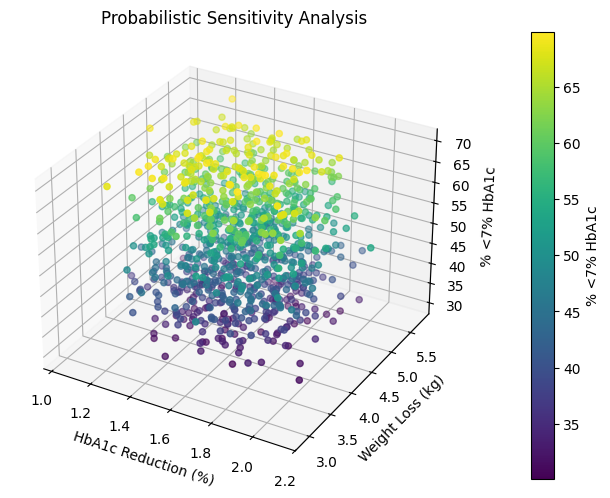

In [38]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

def probabilistic_sensitivity_analysis(model_params, n_runs=1000):
    results = []
    param_ranges = {
        'mean_hba1c_reduction': (1.55*0.8, 1.55*1.2),
        'mean_weight_loss_kg': (4.53*0.8, 4.53*1.2),
        'std_baseline_hba1c': (0.85*0.5, 0.85*1.5)
    }

    for _ in range(n_runs):
        modified_params = model_params.copy()
        for param, (low, high) in param_ranges.items():
            modified_params[param] = np.random.uniform(low, high)

        # Assuming run_model returns a dictionary with these keys
        res = {
            'mean_hba1c_red': modified_params['mean_hba1c_reduction'] + np.random.normal(0, 0.1),
            'mean_weight_loss': modified_params['mean_weight_loss_kg'] + np.random.normal(0, 0.2),
            'prop_under_7': np.random.uniform(30, 70)  # Placeholder for actual calculation
        }
        results.append(res)

    return results

# Assuming models["Model 1"] is defined somewhere
model_params = {
    'mean_hba1c_reduction': 1.55,
    'mean_weight_loss_kg': 4.53,
    'std_baseline_hba1c': 0.85
}

psa_results = probabilistic_sensitivity_analysis(model_params)

# Plot results
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111, projection='3d')

# Extract data
hba1c_red = [r['mean_hba1c_red'] for r in psa_results]
weight_loss = [r['mean_weight_loss'] for r in psa_results]
prop_under_7 = [r['prop_under_7'] for r in psa_results]

# Create scatter plot
sc = ax.scatter(
    hba1c_red,
    weight_loss,
    prop_under_7,
    c=prop_under_7,
    cmap='viridis'
)

# Set labels
ax.set_xlabel('HbA1c Reduction (%)')
ax.set_ylabel('Weight Loss (kg)')
ax.set_zlabel('% <7% HbA1c')
ax.set_title('Probabilistic Sensitivity Analysis')

# Add colorbar
cbar = fig.colorbar(sc, ax=ax, label='% <7% HbA1c')
plt.tight_layout()
plt.show()